In [2]:
# importing useful libs on the go
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold
from xgboost.sklearn import XGBClassifier
import math
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold
from sklearn import cross_validation
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import collections

plt.style.use('fivethirtyeight') # Good looking plots
pd.set_option('display.max_columns', None) # Display any number of columns

% matplotlib inline

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [5]:
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter
from sklearn.feature_selection import mutual_info_classif
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv('train.csv')

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,11,12,13,14,15,16,17,18,19,21,23,26,28,29,30,32,82,83,85,91,269,325,326,327,328) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
test = pd.read_csv('test.csv')

IOError: File test.csv does not exist

In [5]:
trainc = train.copy()
testc = test.copy()

In [6]:
train.shape

(300000, 333)

In [7]:
train['RESPONDERS'].value_counts()

N    295388
Y      4612
Name: RESPONDERS, dtype: int64

In [8]:
train['RESPONDERS'] = train['RESPONDERS'].map({'N':0, 'Y':1}).astype(int)

In [9]:
lis_drop = ['EEG_TAG','EEG_CLOSED', 'PM_FD_MON_02', 'PM_FD_MON_04', 'STMT_CON_DAE_ACTIVE_MON_01', 'STMT_CON_DAE_CLOSED_MON_01', 'MER_EMI_CLOSED_MON_01']

In [10]:
train.drop(lis_drop, axis=1, inplace=True)
test.drop(lis_drop, axis=1, inplace=True)

In [11]:
cust_id = test['CUSTOMER_ID']

In [12]:
train.drop('CUSTOMER_ID', axis=1, inplace=True)
test.drop('CUSTOMER_ID', axis=1, inplace=True)

In [13]:
train['ACT_TYPE'].value_counts()

CSA    213385
SA      86615
Name: ACT_TYPE, dtype: int64

In [14]:
train['ACT_TYPE'] = train['ACT_TYPE'].map({'CSA':0, 'SA':1}).astype(int)
test['ACT_TYPE'] = test['ACT_TYPE'].map({'CSA':0, 'SA':1}).astype(int)

In [15]:
test['GENDER'].value_counts()

M    153468
F     46483
Name: GENDER, dtype: int64

In [16]:
test['GENDER'].isnull().sum()

49

In [17]:
train['GENDER'].fillna('U', inplace=True)
test['GENDER'].fillna('U', inplace=True)


# Unknown in GENDER replaced by 2

In [18]:
train['GENDER'] = train['GENDER'].map({'M':0, 'F':1,'U':2}).astype(int)
test['GENDER'] = test['GENDER'].map({'M':0, 'F':1,'U':2}).astype(int)

In [19]:
trainc['LEGAL_ENTITY'].value_counts()

INDIVIDUAL              299710
OTHERS                     283
NON_GOVERNMENTAL_ORG         4
ASSOCIATION                  2
FIRM                         1
Name: LEGAL_ENTITY, dtype: int64

In [20]:
testc['LEGAL_ENTITY'].value_counts()

INDIVIDUAL              199791
OTHERS                     203
ASSOCIATION                  2
NON_GOVERNMENTAL_ORG         2
TRUSTS                       1
PROPRIETERSHIP               1
Name: LEGAL_ENTITY, dtype: int64

In [21]:
train['LEGAL_ENTITY'] = train['LEGAL_ENTITY'].map({'INDIVIDUAL':0, 'OTHERS':1,'NON_GOVERNMENTAL_ORG':2,'ASSOCIATION':2,'FIRM':2,'TRUSTS':2,'PROPRIETERSHIP':2}).astype(int)
test['LEGAL_ENTITY'] = test['LEGAL_ENTITY'].map({'INDIVIDUAL':0, 'OTHERS':1,'NON_GOVERNMENTAL_ORG':2,'ASSOCIATION':2,'FIRM':2,'TRUSTS':2,'PROPRIETERSHIP':2}).astype(int)

In [22]:
testc['OCCUP_ALL_NEW'].value_counts()

SALARIED    200000
Name: OCCUP_ALL_NEW, dtype: int64

In [23]:
train.drop('OCCUP_ALL_NEW', axis=1, inplace=True)
test.drop('OCCUP_ALL_NEW', axis=1, inplace=True)

In [24]:
trainc['AGE'].value_counts()

26     17479
27     17117
25     16556
24     16318
28     15967
29     15247
30     14165
31     13405
23     13386
32     12653
33     11530
22     10821
34     10661
35      9271
36      8817
37      7854
21      6968
38      6926
39      6032
40      5971
41      5638
42      5173
43      4591
44      4340
45      3880
46      3859
47      3536
48      3266
49      3017
51      2760
50      2746
52      2381
53      2163
54      2010
55      1715
56      1703
57      1621
58      1350
59      1255
217     1177
60      1026
61       963
62       821
63       683
64       626
65       428
117      128
Name: AGE, dtype: int64

In [25]:
testc['AGE'].value_counts()

26     11519
27     11518
25     11083
24     10715
28     10581
29     10084
30      9478
31      9056
23      9027
32      8461
33      7714
22      7270
34      7050
35      6251
36      5792
37      5167
38      4599
21      4481
39      4157
40      3940
41      3760
42      3570
43      3077
44      2991
45      2643
46      2501
47      2391
48      2196
49      1993
51      1812
50      1789
52      1593
54      1425
53      1393
56      1165
55      1152
57      1008
58       905
59       791
217      747
60       674
61       635
62       563
63       474
64       401
65       320
117       88
Name: AGE, dtype: int64

count    300000.000000
mean         34.111603
std          14.981995
min          21.000000
25%          26.000000
50%          31.000000
75%          38.000000
max         217.000000
Name: AGE, dtype: float64


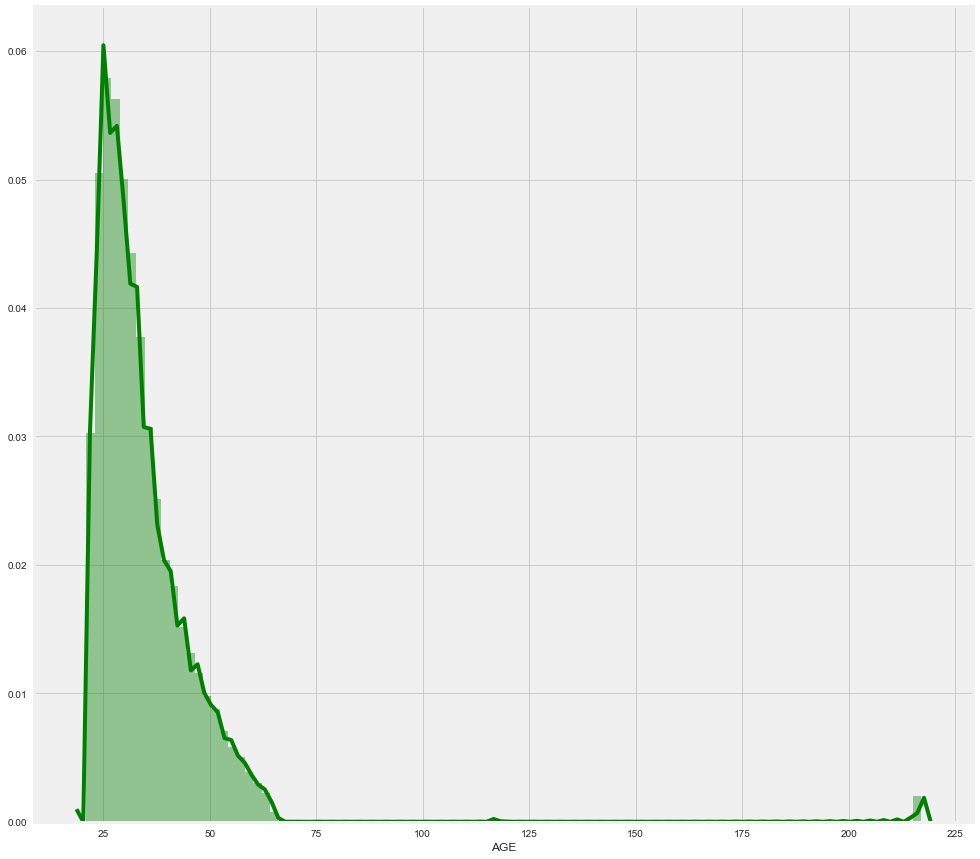

In [26]:
print(trainc['AGE'].describe())
plt.figure(figsize=(15, 15))
sns.distplot(trainc['AGE'], color='g', bins=100, hist_kws={'alpha': 0.4})
plt.show()

In [27]:
train['AGE'] = pd.cut(
    train['AGE'],
    [20, 23, 25, 27, 29, 31, 33, 36, 39, 43, 50,65, 300],
    labels=[1,2,3,4,5,6,7,8,9,10,11,12])

In [28]:
trainc['N_CASA_MAX_BALANCE_MTD'].isnull().sum()

0

In [29]:
train['N_CASA_BAL_RANGE'] = train['N_CASA_MAX_BALANCE_MTD'] - train['N_CASA_MIN_BALANCE_MTD']
test['N_CASA_BAL_RANGE'] = test['N_CASA_MAX_BALANCE_MTD'] - test['N_CASA_MIN_BALANCE_MTD']
train.drop(['N_CASA_MAX_BALANCE_MTD','N_CASA_MIN_BALANCE_MTD'], axis=1, inplace=True)
test.drop(['N_CASA_MAX_BALANCE_MTD','N_CASA_MIN_BALANCE_MTD'], axis=1, inplace=True)

In [30]:
test['BL_TAG'].value_counts()

Y    34
Name: BL_TAG, dtype: int64

In [31]:
train['BL_TAG'].fillna('N', inplace=True)

In [32]:
test['BL_TAG'].fillna('N', inplace=True)

In [33]:
train['BL_TAG'] = train['BL_TAG'].map({'Y':1, 'N':0}).astype(int)
test['BL_TAG'] = test['BL_TAG'].map({'Y':1, 'N':0}).astype(int)

In [34]:
test['TWL_TAG'].value_counts()

Y    3260
Name: TWL_TAG, dtype: int64

In [35]:
train['TWL_TAG'].fillna('N', inplace=True)
test['TWL_TAG'].fillna('N', inplace=True)

In [36]:

train['TWL_TAG'] = train['TWL_TAG'].map({'Y':1, 'N':0}).astype(int)
test['TWL_TAG'] = test['TWL_TAG'].map({'Y':1, 'N':0}).astype(int)

In [37]:
test['PL_TAG'].value_counts()

Y    11884
Name: PL_TAG, dtype: int64

In [38]:
train['PL_TAG'].fillna('N', inplace=True)
test['PL_TAG'].fillna('N', inplace=True)

train['PL_TAG'] = train['PL_TAG'].map({'Y':1, 'N':0}).astype(int)
test['PL_TAG'] = test['PL_TAG'].map({'Y':1, 'N':0}).astype(int)

In [39]:
train['AL_CNC_TAG'].value_counts()

Y    577
Name: AL_CNC_TAG, dtype: int64

In [40]:
train['AL_CNC_TAG'].fillna('N', inplace=True)
test['AL_CNC_TAG'].fillna('N', inplace=True)

train['AL_CNC_TAG'] = train['AL_CNC_TAG'].map({'Y':1, 'N':0}).astype(int)
test['AL_CNC_TAG'] = test['AL_CNC_TAG'].map({'Y':1, 'N':0}).astype(int)

In [41]:
test['AGRI_TAG'].value_counts()

Y    16
Name: AGRI_TAG, dtype: int64

In [42]:
train['AGRI_TAG'].fillna('N', inplace=True)
test['AGRI_TAG'].fillna('N', inplace=True)

train['AGRI_TAG'] = train['AGRI_TAG'].map({'Y':1, 'N':0}).astype(int)
test['AGRI_TAG'] = test['AGRI_TAG'].map({'Y':1, 'N':0}).astype(int)

In [43]:
train['CE_TAG'].value_counts()

Y    1
Name: CE_TAG, dtype: int64

In [44]:
train.drop('CE_TAG',axis=1,inplace=True)
test.drop('CE_TAG',axis=1,inplace=True)

In [45]:
train['CV_TAG'].value_counts()

Y    18
Name: CV_TAG, dtype: int64

In [46]:
train['CV_TAG'].fillna('N', inplace=True)
test['CV_TAG'].fillna('N', inplace=True)

train['CV_TAG'] = train['CV_TAG'].map({'Y':1, 'N':0}).astype(int)
test['CV_TAG'] = test['CV_TAG'].map({'Y':1, 'N':0}).astype(int)

In [47]:
train['EDU_TAG'].value_counts()

Y    45
Name: EDU_TAG, dtype: int64

In [48]:
train['EDU_TAG'].fillna('N', inplace=True)
test['EDU_TAG'].fillna('N', inplace=True)

train['EDU_TAG'] = train['EDU_TAG'].map({'Y':1, 'N':0}).astype(int)
test['EDU_TAG'] = test['EDU_TAG'].map({'Y':1, 'N':0}).astype(int)

In [49]:
train['TL_TAG'].value_counts()

Y    16
Name: TL_TAG, dtype: int64

In [50]:
train['TL_TAG'].fillna('N', inplace=True)
test['TL_TAG'].fillna('N', inplace=True)

train['TL_TAG'] = train['TL_TAG'].map({'Y':1, 'N':0}).astype(int)
test['TL_TAG'] = test['TL_TAG'].map({'Y':1, 'N':0}).astype(int)

In [51]:
train['OTHER_LOANS_TAG'].value_counts()

Y    425
Name: OTHER_LOANS_TAG, dtype: int64

In [52]:
train['OTHER_LOANS_TAG'].fillna('N', inplace=True)
test['OTHER_LOANS_TAG'].fillna('N', inplace=True)

train['OTHER_LOANS_TAG'] = train['OTHER_LOANS_TAG'].map({'Y':1, 'N':0}).astype(int)
test['OTHER_LOANS_TAG'] = test['OTHER_LOANS_TAG'].map({'Y':1, 'N':0}).astype(int)

In [53]:
train['LAP_TAG'].value_counts()

Y    63
Name: LAP_TAG, dtype: int64

In [54]:
train['LAP_TAG'].fillna('N', inplace=True)
test['LAP_TAG'].fillna('N', inplace=True)

train['LAP_TAG'] = train['LAP_TAG'].map({'Y':1, 'N':0}).astype(int)
test['LAP_TAG'] = test['LAP_TAG'].map({'Y':1, 'N':0}).astype(int)

In [55]:
train['LAS_TAG'].value_counts()

Y    29
Name: LAS_TAG, dtype: int64

In [56]:
train['LAS_TAG'].fillna('N', inplace=True)
test['LAS_TAG'].fillna('N', inplace=True)

train['LAS_TAG'] = train['LAS_TAG'].map({'Y':1, 'N':0}).astype(int)
test['LAS_TAG'] = test['LAS_TAG'].map({'Y':1, 'N':0}).astype(int)

In [57]:
test['BBG_TAG'].value_counts()

Series([], Name: BBG_TAG, dtype: int64)

In [58]:
train.drop('BBG_TAG',axis=1,inplace=True)
test.drop('BBG_TAG',axis=1,inplace=True)

In [59]:
train['HL_TAG'].value_counts()

Y    2628
Name: HL_TAG, dtype: int64

In [60]:
train['HL_TAG'].fillna('N', inplace=True)
test['HL_TAG'].fillna('N', inplace=True)

train['HL_TAG'] = train['HL_TAG'].map({'Y':1, 'N':0}).astype(int)
test['HL_TAG'] = test['HL_TAG'].map({'Y':1, 'N':0}).astype(int)

In [61]:
train['GL_TAG'].value_counts()

Y    766
Name: GL_TAG, dtype: int64

In [62]:
train['GL_TAG'].fillna('N', inplace=True)
test['GL_TAG'].fillna('N', inplace=True)

train['GL_TAG'] = train['GL_TAG'].map({'Y':1, 'N':0}).astype(int)
test['GL_TAG'] = test['GL_TAG'].map({'Y':1, 'N':0}).astype(int)

In [63]:
(16.0/200000)*100

0.008

In [64]:
bin_col = ['BL_TAG','TWL_TAG','PL_TAG','AL_CNC_TAG','AGRI_TAG','CV_TAG','EDU_TAG','TL_TAG','OTHER_LOANS_TAG','LAP_TAG','LAS_TAG','HL_TAG','GL_TAG']
zero_list = []
one_list = []
for col in bin_col:
    zero_list.append((train[col]==0).sum())
    one_list.append((train[col]==1).sum())

In [65]:
trace1 = go.Bar(
    x=bin_col,
    y=zero_list ,
    name='Zero count'
)
trace2 = go.Bar(
    x=bin_col,
    y=one_list,
    name='One count'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title='Count of 1 and 0 in binary variables'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

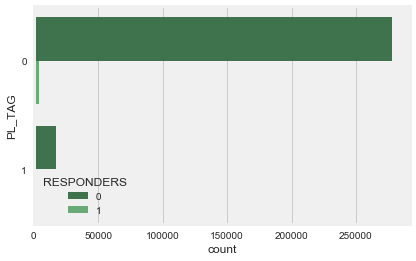

In [66]:
sns.countplot(y="PL_TAG", hue="RESPONDERS", data=train, palette="Greens_d");

In [67]:
train[train['HL_TAG']==1]['RESPONDERS'].value_counts()

0    2595
1      33
Name: RESPONDERS, dtype: int64

In [68]:
train[train['HL_TAG']==0]['RESPONDERS'].value_counts()

0    292793
1      4579
Name: RESPONDERS, dtype: int64

In [69]:
239.0/17563

0.01360815350452656

In [70]:
4373.0/277825

0.01574012417888959

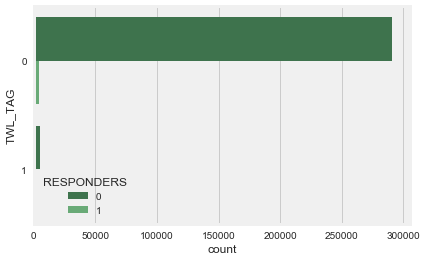

In [71]:
sns.countplot(y="TWL_TAG", hue="RESPONDERS", data=train, palette="Greens_d");

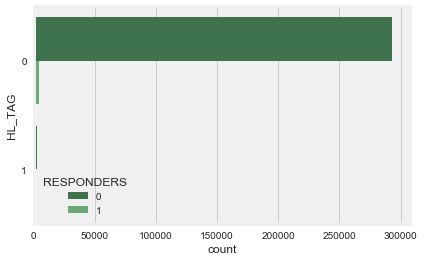

In [72]:
sns.countplot(y="HL_TAG", hue="RESPONDERS", data=train, palette="Greens_d");

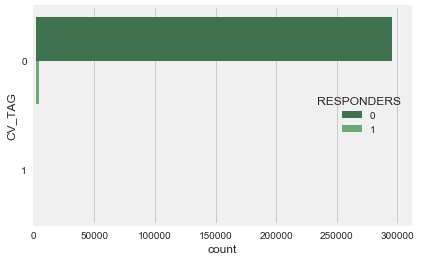

In [73]:
sns.countplot(y="CV_TAG", hue="RESPONDERS", data=train, palette="Greens_d");

In [74]:
train[train['CV_TAG']==1]['RESPONDERS'].value_counts()

0    18
Name: RESPONDERS, dtype: int64

In [75]:
train[train['CV_TAG']==0]['RESPONDERS'].value_counts()

0    295370
1      4612
Name: RESPONDERS, dtype: int64

In [76]:
train[train['EDU_TAG']==1]['RESPONDERS'].value_counts()

0    43
1     2
Name: RESPONDERS, dtype: int64

In [77]:
train[train['EDU_TAG']==0]['RESPONDERS'].value_counts()

0    295345
1      4610
Name: RESPONDERS, dtype: int64

In [78]:
train[train['LAP_TAG']==1]['RESPONDERS'].value_counts()

0    62
1     1
Name: RESPONDERS, dtype: int64

In [79]:
train[train['LAP_TAG']==0]['RESPONDERS'].value_counts()

0    295326
1      4611
Name: RESPONDERS, dtype: int64

In [80]:
bin_col = ['BL_TAG','AGRI_TAG','CV_TAG','EDU_TAG','TL_TAG','LAP_TAG','LAS_TAG']


In [81]:
train.drop(bin_col , axis=1,inplace=True)
test.drop(bin_col , axis=1,inplace=True)

In [82]:
train['TAG'] = train['TWL_TAG'] + train['PL_TAG'] + train['AL_CNC_TAG'] + train['OTHER_LOANS_TAG']+ train['HL_TAG'] + train['GL_TAG']

In [83]:
test['TAG'] = test['TWL_TAG'] + test['PL_TAG'] + test['AL_CNC_TAG'] + test['OTHER_LOANS_TAG']+ test['HL_TAG'] + test['GL_TAG']

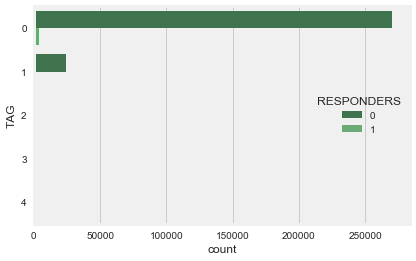

In [84]:
sns.countplot(y="TAG", hue="RESPONDERS", data=train, palette="Greens_d");

In [85]:
train[train['TAG']==1]['RESPONDERS'].value_counts()

0    24307
1      417
Name: RESPONDERS, dtype: int64

In [86]:
train[train['TAG']==0]['RESPONDERS'].value_counts()

0    269933
1      4178
Name: RESPONDERS, dtype: int64

In [87]:
train.drop(['TWL_TAG','PL_TAG','AL_CNC_TAG','OTHER_LOANS_TAG','HL_TAG','GL_TAG'] , axis=1 , inplace=True )

In [88]:
test.drop(['TWL_TAG','PL_TAG','AL_CNC_TAG','OTHER_LOANS_TAG','HL_TAG','GL_TAG'] , axis=1 , inplace=True )

In [89]:
def justYcol(col_name):
    train[col_name].fillna('N', inplace=True)
    test[col_name].fillna('N', inplace=True)

    train[col_name] = train[col_name].map({'Y':1, 'N':0}).astype(int)
    test[col_name] = test[col_name].map({'Y':1, 'N':0}).astype(int)
    

In [90]:
lis = ['AL_CLOSED','PL_CLOSED','BL_CLOSED','TWL_CLOSED','CV_CLOSED','LAP_CLOSED','LAS_CLOSED','BBG_CLOSED','GL_CLOSED']

In [91]:
for col in lis :
    print train[col].isnull().sum()

298745
292680
299952
297598
299977
299931
299970
299998
298864


In [92]:
for col in lis :
    print train[col].value_counts()

Y    1255
Name: AL_CLOSED, dtype: int64
Y    7320
Name: PL_CLOSED, dtype: int64
Y    48
Name: BL_CLOSED, dtype: int64
Y    2402
Name: TWL_CLOSED, dtype: int64
Y    23
Name: CV_CLOSED, dtype: int64
Y    69
Name: LAP_CLOSED, dtype: int64
Y    30
Name: LAS_CLOSED, dtype: int64
Y    2
Name: BBG_CLOSED, dtype: int64
Y    1136
Name: GL_CLOSED, dtype: int64


In [93]:
for col in lis:
    justYcol(col)

In [94]:
zero_list = []
one_list = []
for col in lis:
    zero_list.append((train[col]==0).sum())
    one_list.append((train[col]==1).sum())

In [95]:
trace1 = go.Bar(
    x=lis,
    y=zero_list ,
    name='Zero count'
)
trace2 = go.Bar(
    x=lis,
    y=one_list,
    name='One count'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title='Count of 1 and 0 in binary variables'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [96]:
train[train['PL_CLOSED']==1]['RESPONDERS'].value_counts()

0    6895
1     425
Name: RESPONDERS, dtype: int64

In [97]:
train[train['PL_CLOSED']==0]['RESPONDERS'].value_counts()

0    288493
1      4187
Name: RESPONDERS, dtype: int64

In [98]:
train[train['TWL_CLOSED']==1]['RESPONDERS'].value_counts()

0    2313
1      89
Name: RESPONDERS, dtype: int64

In [99]:
train[train['TWL_CLOSED']==0]['RESPONDERS'].value_counts()

0    293075
1      4523
Name: RESPONDERS, dtype: int64

In [100]:
train['CLOSED'] = train['AL_CLOSED']+train['PL_CLOSED'] +train['TWL_CLOSED'] + train['GL_CLOSED']

In [101]:
test['CLOSED'] = test['AL_CLOSED']+test['PL_CLOSED'] +test['TWL_CLOSED'] + test['GL_CLOSED']

In [102]:
train.drop(lis,axis=1,inplace=True)

In [103]:
test.drop(lis,axis=1,inplace=True)

In [104]:
lis = ['CC_HOLD_MON_01','CC_HOLD_MON_02','CC_HOLD_MON_03','CC_ACTIVE_MON_01','CC_ACTIVE_MON_02','CC_ACTIVE_MON_03','DC_ACTIVE_MON_01','DC_ACTIVE_MON_02','DC_ACTIVE_MON_03']

In [105]:
for col in lis:
    justYcol(col)

In [106]:
for col in lis:
    print train[col].value_counts()

0    228913
1     71087
Name: CC_HOLD_MON_01, dtype: int64
0    229290
1     70710
Name: CC_HOLD_MON_02, dtype: int64
0    229613
1     70387
Name: CC_HOLD_MON_03, dtype: int64
0    256241
1     43759
Name: CC_ACTIVE_MON_01, dtype: int64
0    258499
1     41501
Name: CC_ACTIVE_MON_02, dtype: int64
0    257756
1     42244
Name: CC_ACTIVE_MON_03, dtype: int64
0    207255
1     92745
Name: DC_ACTIVE_MON_01, dtype: int64
0    209543
1     90457
Name: DC_ACTIVE_MON_02, dtype: int64
0    202041
1     97959
Name: DC_ACTIVE_MON_03, dtype: int64


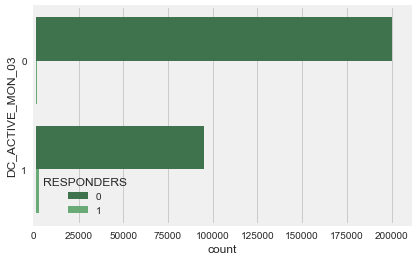

In [107]:
sns.countplot(y="DC_ACTIVE_MON_03", hue="RESPONDERS", data=train, palette="Greens_d");

In [108]:
train[train['DC_ACTIVE_MON_03']==1]['RESPONDERS'].value_counts()

0    95270
1     2689
Name: RESPONDERS, dtype: int64

In [109]:
train[train['DC_ACTIVE_MON_03']==0]['RESPONDERS'].value_counts()

0    200118
1      1923
Name: RESPONDERS, dtype: int64

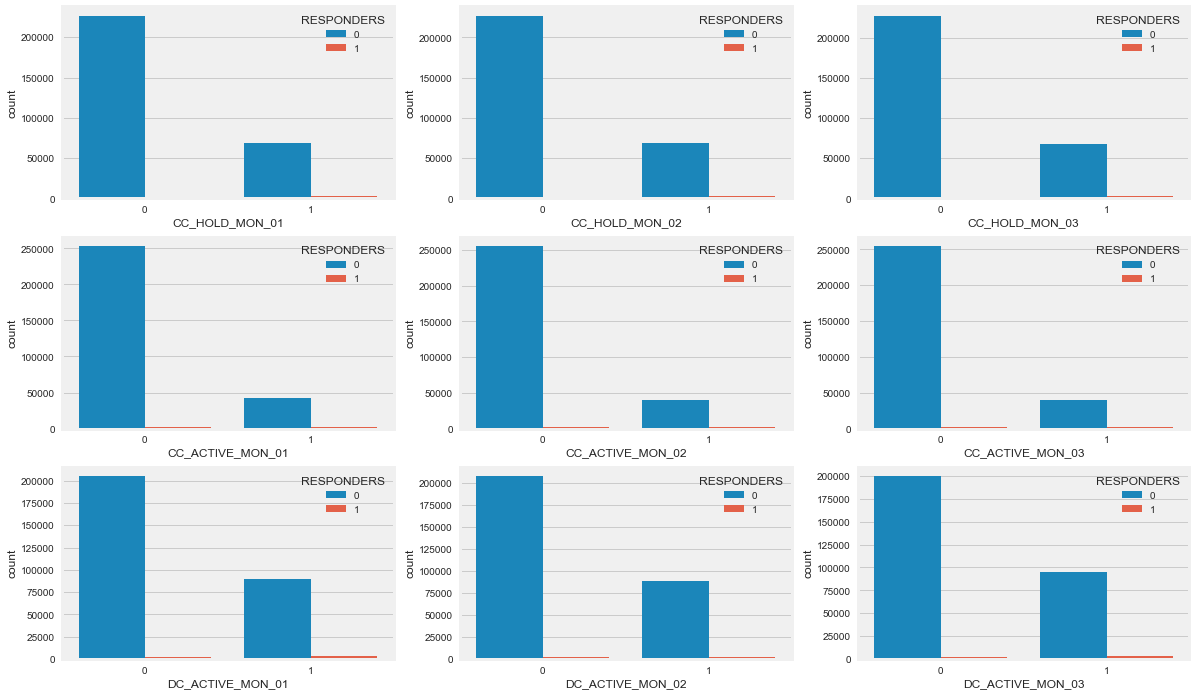

In [110]:
fig, ax = plt.subplots(3, 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(lis) :
        sns.countplot(x=lis[i],hue='RESPONDERS', data=train, ax=ax)

In [111]:
zero_list = []
one_list = []
for col in lis:
    zero_list.append((train[col]==0).sum())
    one_list.append((train[col]==1).sum())

In [112]:
trace1 = go.Bar(
    x=lis,
    y=zero_list ,
    name='Zero count'
)
trace2 = go.Bar(
    x=lis,
    y=one_list,
    name='One count'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title='Count of 1 and 0 in binary variables'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [113]:
train['CCHOLD'] = train['CC_HOLD_MON_01'] + train['CC_HOLD_MON_02'] + train['CC_HOLD_MON_03']

In [114]:
train['CCACTIVE'] = train['CC_ACTIVE_MON_01'] + train['CC_ACTIVE_MON_02'] + train['CC_ACTIVE_MON_03']

In [115]:
train['DCACTIVE'] = train['DC_ACTIVE_MON_01'] + train['DC_ACTIVE_MON_02'] + train['DC_ACTIVE_MON_03']

In [116]:
test['CCHOLD'] = test['CC_HOLD_MON_01'] + test['CC_HOLD_MON_02'] + test['CC_HOLD_MON_03']
test['CCACTIVE'] = test['CC_ACTIVE_MON_01'] + test['CC_ACTIVE_MON_02'] + test['CC_ACTIVE_MON_03']
test['DCACTIVE'] = test['DC_ACTIVE_MON_01'] + test['DC_ACTIVE_MON_02'] + test['DC_ACTIVE_MON_03']

In [117]:
train.drop(lis , axis=1 , inplace=True)
test.drop(lis , axis=1 , inplace=True)


In [118]:
train.shape , test.shape

((300000, 295), (200000, 294))

In [119]:
for x in ['CC_HOLD','CC_ACTIVE','DC_ACTIVE']:
    
    justYcol(x)

In [120]:
(train['CC_HOLD']==train['CCHOLD']).sum()

229288

In [121]:
(train['CC_ACTIVE']==train['CCACTIVE']).sum()

257312

In [122]:
(train['DC_ACTIVE']==train['DCACTIVE']).sum()

207369

In [123]:
justYcol('DC_HOLD')

In [124]:
lis = ['DC_SPEND_MON_01','DC_SPEND_MON_02','DC_SPEND_MON_03','DC_SPEND_MON_04','DC_SPEND_MON_05','DC_SPEND_MON_06']

In [125]:
for col in lis:
    print train[col].isnull().sum()

252094
252422
245673
239349
218478
233065


In [126]:
for col in lis:
    print train[col].mean()

3750.50256878
3711.13073269
4187.852979
4731.48839673
5369.00966389
5352.92324598


In [127]:
for col in lis:
    train[col].fillna(0.0,inplace=True)

In [128]:
for col in lis:
    test[col].fillna(0.0,inplace=True)

In [129]:
train['DC_SPEND'] = train['DC_SPEND_MON_01'] + train['DC_SPEND_MON_02'] + train['DC_SPEND_MON_03'] + train['DC_SPEND_MON_04'] + train['DC_SPEND_MON_05']+train['DC_SPEND_MON_06']
test['DC_SPEND'] = test['DC_SPEND_MON_01'] + test['DC_SPEND_MON_02'] + test['DC_SPEND_MON_03'] + test['DC_SPEND_MON_04'] + test['DC_SPEND_MON_05']+ test['DC_SPEND_MON_06']

In [130]:
train.drop(lis , axis=1 , inplace=True)
test.drop(lis , axis=1 , inplace=True)


In [131]:
lis = ['CC_SPEND_MON_01','CC_SPEND_MON_02','CC_SPEND_MON_03','CC_SPEND_MON_04','CC_SPEND_MON_05','CC_SPEND_MON_06']

In [132]:
for col in lis:
    print train[col].isnull().sum()

274400
275778
273160
273844
261792
262675


In [133]:
for col in lis:
    train[col].fillna(0.0,inplace=True)
    test[col].fillna(0.0,inplace=True)

In [134]:
train['CC_SPEND'] = train['CC_SPEND_MON_01'] + train['CC_SPEND_MON_02'] + train['CC_SPEND_MON_03'] + train['CC_SPEND_MON_04'] + train['CC_SPEND_MON_05']+train['CC_SPEND_MON_06']
test['CC_SPEND'] = test['CC_SPEND_MON_01'] + test['CC_SPEND_MON_02'] + test['CC_SPEND_MON_03'] + test['CC_SPEND_MON_04'] + test['CC_SPEND_MON_05']+ test['CC_SPEND_MON_06']

In [135]:
train.drop(lis , axis=1 , inplace=True)
test.drop(lis , axis=1 , inplace=True)


In [136]:
train.shape , test.shape

((300000, 285), (200000, 284))

In [137]:
(trainc['DC_SPEND_MON_06'] == 0).sum()

1

In [138]:
copy = train[train['CC_SPEND']>0]

count    5.139100e+04
mean     3.477375e+04
std      5.780328e+04
min      1.000000e-02
25%      6.001295e+03
50%      1.799184e+04
75%      4.174184e+04
max      2.345576e+06
Name: CC_SPEND, dtype: float64


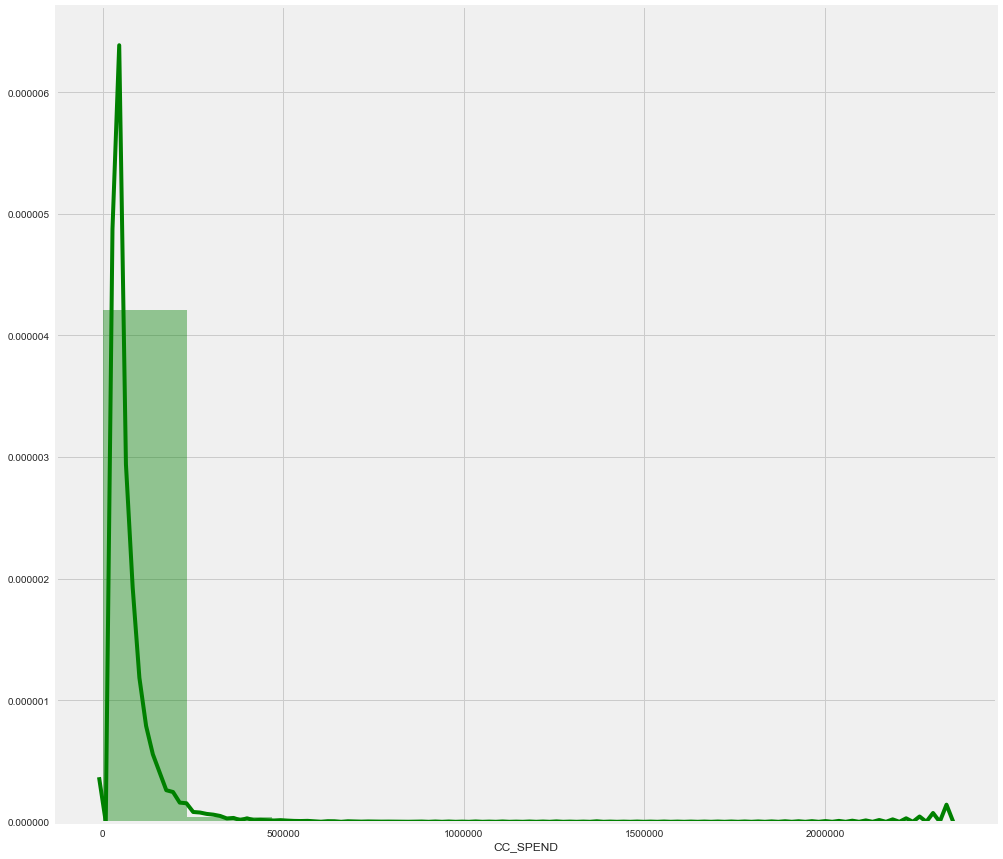

In [139]:
print(copy['CC_SPEND'].describe())
plt.figure(figsize=(15, 15))
sns.distplot(copy['CC_SPEND'], color='g', bins=10, hist_kws={'alpha': 0.4})
plt.show()

In [140]:
train['CC_SPEND'] = pd.cut(
    train['CC_SPEND'],
    [-1 ,0,10000, 20000 , 30000, 40000, 60000,100000 , 400000 ,2400000 ],
    labels=[1,2,3,4,5,6,7,8,9])

In [141]:
train['CC_SPEND'].isnull().sum()

0

In [142]:
copy = train[train['DC_SPEND']>0]

count    1.187170e+05
mean     1.403938e+04
std      2.595939e+04
min      1.000000e-02
25%      1.600050e+03
50%      5.495000e+03
75%      1.577292e+04
max      1.191056e+06
Name: DC_SPEND, dtype: float64


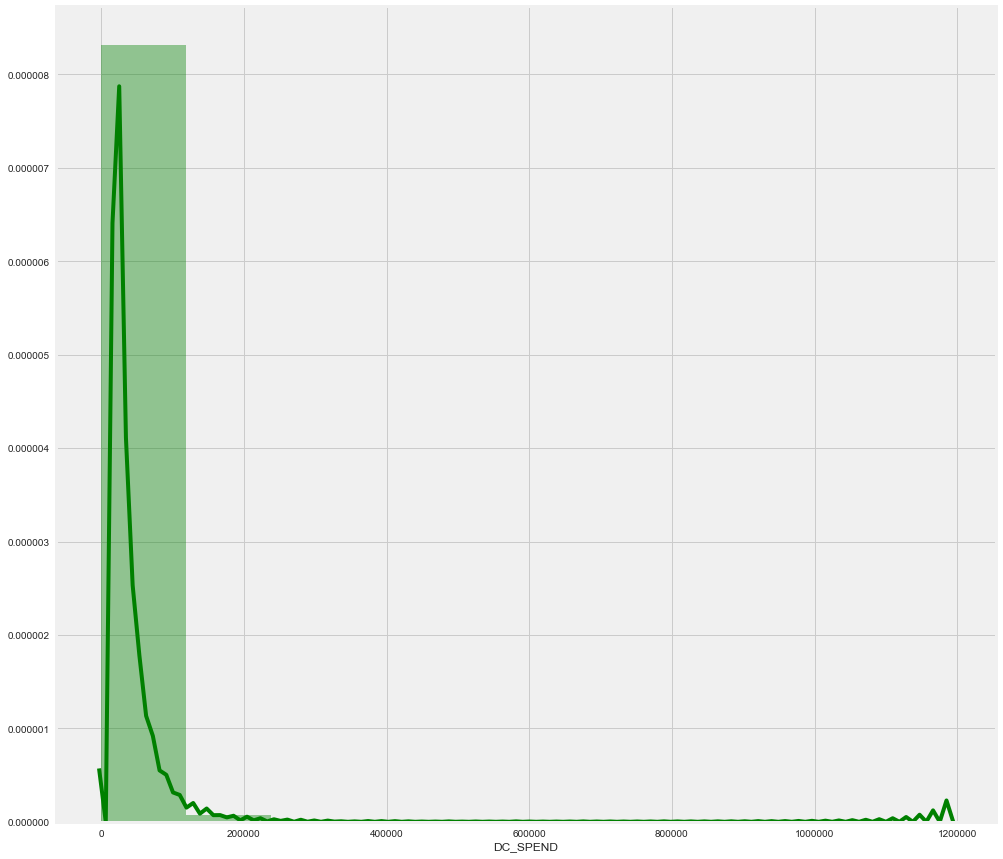

In [143]:
print(copy['DC_SPEND'].describe())
plt.figure(figsize=(15, 15))
sns.distplot(copy['DC_SPEND'], color='g', bins=10, hist_kws={'alpha': 0.4})
plt.show()

In [144]:
train['DC_SPEND'] = pd.cut(
    train['DC_SPEND'],
    [-1 ,0,2500,5000, 10000,17000 , 40000, 80000,200000,2400000 ],
    labels=[1,2,3,4,5,6,7,8,9])

In [145]:
train['DC_SPEND'].isnull().sum()

0

In [146]:
list(trainc)

['CUSTOMER_ID',
 'ACT_TYPE',
 'GENDER',
 'LEGAL_ENTITY',
 'OCCUP_ALL_NEW',
 'AGE',
 'N_CASA_MAX_BALANCE_MTD',
 'N_CASA_MIN_BALANCE_MTD',
 'BL_TAG',
 'TWL_TAG',
 'PL_TAG',
 'AL_CNC_TAG',
 'AGRI_TAG',
 'CE_TAG',
 'CV_TAG',
 'EDU_TAG',
 'TL_TAG',
 'OTHER_LOANS_TAG',
 'LAP_TAG',
 'LAS_TAG',
 'EEG_TAG',
 'BBG_TAG',
 'HL_TAG',
 'GL_TAG',
 'AL_CLOSED',
 'PL_CLOSED',
 'BL_CLOSED',
 'TWL_CLOSED',
 'CV_CLOSED',
 'LAP_CLOSED',
 'LAS_CLOSED',
 'EEG_CLOSED',
 'BBG_CLOSED',
 'GL_CLOSED',
 'CC_HOLD_MON_03',
 'CC_HOLD_MON_02',
 'CC_HOLD_MON_01',
 'CC_ACTIVE_MON_03',
 'CC_ACTIVE_MON_02',
 'CC_ACTIVE_MON_01',
 'CC_HOLD',
 'CC_ACTIVE',
 'DC_HOLD',
 'DC_ACTIVE_MON_03',
 'DC_ACTIVE_MON_02',
 'DC_ACTIVE_MON_01',
 'DC_ACTIVE',
 'DC_SPEND_MON_03',
 'DC_SPEND_MON_02',
 'DC_SPEND_MON_01',
 'CC_SPEND_MON_04',
 'CC_SPEND_MON_01',
 'CC_SPEND_MON_02',
 'CC_SPEND_MON_03',
 'DC_SPEND_MON_04',
 'PM_FD_MON_01',
 'PM_FD_MON_02',
 'PM_FD_MON_04',
 'CR_LIMIT',
 'STMT_MON_03',
 'STMT_MON_02',
 'STMT_MON_01',
 'COC_ELIGIBLE

In [147]:
l =[]
for col in list(trainc):
    if 0 in trainc[col].unique():
        l.append(col)

In [148]:
len(l)

51

In [149]:
for c in l:
    print c + '    '  + str((trainc[c] == 0).sum())

N_CASA_MAX_BALANCE_MTD    67137
N_CASA_MIN_BALANCE_MTD    103036
DC_SPEND_MON_01    1
CR_LIMIT    5212
STMT_MON_03    25610
STMT_MON_02    25042
STMT_MON_01    24464
COC_ELIGIBLE    268504
EOP_BAL_MON_01    68442
AMB_MON_04    67648
AMB_MON_01    67107
AMB_MON_02    70643
AMB_MON_03    67381
LI_MON_04    15
LI_MON_01    15
GI_MON_04    60
GI_MON_01    85
DC_SPEND_MON_06    1
DC_SPEND_MON_01_TRL    1
PL2CC_ELIGIBLE    282230
D_AMT_L3_MON_06    6
C_AMT_L3_MON_06    4
C_COUNT_L3_MON_06    33468
D_COUNT_L3_MON_06    4523
D_AMT_L3_MON_05    37
C_AMT_L3_MON_05    3
C_COUNT_L3_MON_05    21266
D_COUNT_L3_MON_05    9607
D_AMT_L3_MON_04    20
C_AMT_L3_MON_04    1
C_COUNT_L3_MON_04    1058
D_COUNT_L3_MON_04    39225
D_AMT_L3_MON_03    11
C_AMT_L3_MON_03    2
C_COUNT_L3_MON_03    35952
D_COUNT_L3_MON_03    4734
D_AMT_L3_MON_02    31
C_AMT_L3_MON_02    5
C_COUNT_L3_MON_02    18858
D_COUNT_L3_MON_02    8361
D_AMT_L3_MON_01    28
C_AMT_L3_MON_01    1
C_COUNT_L3_MON_01    813
D_COUNT_L3_MON_01    4020

In [150]:
train['PM_FD_MON_01'].value_counts()

1.0    825
Name: PM_FD_MON_01, dtype: int64

In [151]:
train['PM_FD_MON_01'].fillna(0,inplace=True)

In [152]:
train['CR_LIMIT'].value_counts()

30000.0     6375
0.0         5212
50000.0     4821
75000.0     4725
100000.0    4605
40000.0     4226
25000.0     2927
20000.0     2291
35000.0     1980
45000.0     1623
60000.0     1494
150000.0    1447
300000.0    1086
65000.0      985
200000.0     936
15000.0      904
125000.0     882
70000.0      881
130000.0     700
55000.0      694
90000.0      687
39000.0      677
600000.0     665
52000.0      620
97000.0      549
80000.0      538
32000.0      529
26000.0      516
36000.0      486
42000.0      477
            ... 
429000.0       1
599000.0       1
598000.0       1
431000.0       1
433000.0       1
74100.0        1
492000.0       1
438750.0       1
578000.0       1
18990.0        1
106350.0       1
845000.0       1
407000.0       1
81001.0        1
30500.0        1
15600.0        1
80360.0        1
212500.0       1
101250.0       1
70500.0        1
830000.0       1
363000.0       1
4000.0         1
417000.0       1
625000.0       1
63990.0        1
970000.0       1
615000.0      

# Need to do something for CR_LIMIT

In [153]:
train['STMT_MON_03'].isnull().sum()

217000

In [154]:
train['STMT_MON_03'].fillna(0,inplace=True)

In [155]:
train['STMT_MON_02'].fillna(0,inplace=True)
train['STMT_MON_01'].fillna(0,inplace=True)

In [156]:
train['CC_STMT'] = train['STMT_MON_03'] + train['STMT_MON_02'] + train['STMT_MON_01']

In [157]:
train.drop(['STMT_MON_03','STMT_MON_02','STMT_MON_01'],axis=1,inplace=True)

In [158]:
test['STMT_MON_02'].fillna(0,inplace=True)
test['STMT_MON_01'].fillna(0,inplace=True)
test['STMT_MON_02'].fillna(0,inplace=True)

In [159]:
test['CC_STMT'] = test['STMT_MON_03'] + test['STMT_MON_02'] + test['STMT_MON_01']
test.drop(['STMT_MON_03','STMT_MON_02','STMT_MON_01'],axis=1,inplace=True)

In [160]:
train['COC_ELIGIBLE'].isnull().sum()

0

In [161]:
live = ['LAP_SCRUB_LIVE','LAS_SCRUB_LIVE','PL_SCRUB_LIVE','GL_SCRUB_LIVE','TWL_SCRUB_LIVE','BL_SCRUB_LIVE','CEL_SCRUB_LIVE','TL_SCRUB_LIVE','AL_SCRUB_LIVE']

In [162]:
for col in live:
    train[col].fillna(0,inplace=True)
    
    

In [163]:
for col in live:
    test[col].fillna(0,inplace=True)
    
    

In [164]:
for col in live:
    print test[col].value_counts()

0.0    198111
1.0      1889
Name: LAP_SCRUB_LIVE, dtype: int64
0.0    199768
1.0       232
Name: LAS_SCRUB_LIVE, dtype: int64
0.0    191039
1.0      8961
Name: PL_SCRUB_LIVE, dtype: int64
0.0    196093
1.0      3907
Name: GL_SCRUB_LIVE, dtype: int64
0.0    195380
1.0      4620
Name: TWL_SCRUB_LIVE, dtype: int64
0.0    199510
1.0       490
Name: BL_SCRUB_LIVE, dtype: int64
0.0    199993
1.0         7
Name: CEL_SCRUB_LIVE, dtype: int64
0.0    199849
1.0       151
Name: TL_SCRUB_LIVE, dtype: int64
0.0    193803
1.0      6197
Name: AL_SCRUB_LIVE, dtype: int64


In [165]:
zero_list = []
one_list = []
for col in live:
    zero_list.append((train[col]==0).sum())
    one_list.append((train[col]==1).sum())

In [166]:
trace1 = go.Bar(
    x=live,
    y=zero_list ,
    name='Zero count'
)
trace2 = go.Bar(
    x=live,
    y=one_list,
    name='One count'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title='Count of 1 and 0 in binary variables'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

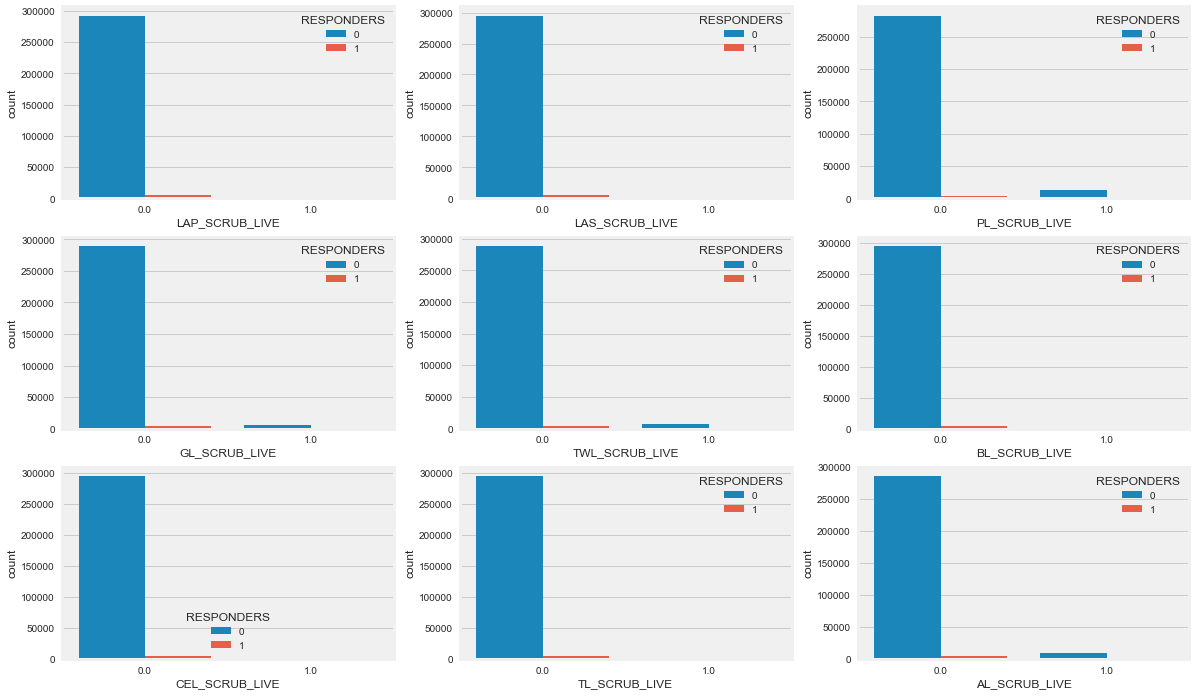

In [167]:
fig, ax = plt.subplots(3, 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(live) :
        sns.countplot(x=live[i],hue='RESPONDERS', data=train, ax=ax)

In [168]:
train['LIVE'] = 0
for col in live:
    train['LIVE'] += train[col]

In [169]:
test['LIVE'] = 0
for col in live:
    test['LIVE'] += test[col]

In [170]:
train['LIVE'].value_counts()

0.0    265065
1.0     30739
2.0      3770
3.0       386
4.0        35
5.0         5
Name: LIVE, dtype: int64

In [171]:
train.drop(live,axis=1,inplace=True)

In [172]:
test.drop(live,axis=1,inplace=True)

In [173]:
closed = ['LAP_SCRUB_CLOSED','LAS_SCRUB_CLOSED','PL_SCRUB_CLOSED','GL_SCRUB_CLOSED','TWL_SCRUB_CLOSED','BL_SCRUB_CLOSED','CEL_SCRUB_CLOSED','TL_SCRUB_CLOSED','AL_SCRUB_CLOSED']

In [174]:
for col in closed:
    print train[col].value_counts()

1.0    1008
Name: LAP_SCRUB_CLOSED, dtype: int64
1.0    414
Name: LAS_SCRUB_CLOSED, dtype: int64
1.0    13850
Name: PL_SCRUB_CLOSED, dtype: int64
1.0    9259
Name: GL_SCRUB_CLOSED, dtype: int64
1.0    12665
Name: TWL_SCRUB_CLOSED, dtype: int64
1.0    473
Name: BL_SCRUB_CLOSED, dtype: int64
1.0    12
Name: CEL_SCRUB_CLOSED, dtype: int64
1.0    159
Name: TL_SCRUB_CLOSED, dtype: int64
1.0    9240
Name: AL_SCRUB_CLOSED, dtype: int64


In [175]:
for col in closed:
    test[col].fillna(0,inplace=True)
    
    

In [176]:
for col in closed:
    train[col].fillna(0,inplace=True)
    
    

In [177]:
zero_list = []
one_list = []
for col in closed:
    zero_list.append((train[col]==0).sum())
    one_list.append((train[col]==1).sum())

In [178]:
trace1 = go.Bar(
    x=closed,
    y=zero_list ,
    name='Zero count'
)
trace2 = go.Bar(
    x=closed,
    y=one_list,
    name='One count'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title='Count of 1 and 0 in binary variables'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [179]:
train['CLOSED'] = 0
for col in closed:
    train['CLOSED'] += train[col]

In [180]:
test['CLOSED'] = 0
for col in closed:
    test['CLOSED'] += test[col]
test.drop(closed,axis=1,inplace=True)

In [181]:
train.drop(closed,axis=1,inplace=True)

In [182]:
train.shape , test.shape

((300000, 266), (200000, 265))

In [183]:
train['MATURITY_GL'].value_counts().sum()

1102L

In [184]:
trainc['MATURITY_GL'].fillna(0,inplace=True)

In [185]:
l=[]
for row in trainc['MATURITY_GL']:
    if row==0:
        l.append(0)
    else:
        l.append(1)

In [186]:
Counter(l)

Counter({0: 298898, 1: 1102})

In [187]:
train['MATURITY_GL']=l

In [188]:
trainc['MATURITY_LAS'].fillna(0,inplace=True)
trainc['MATURITY_LAP'].fillna(0,inplace=True)

In [189]:
l=[]
for row in trainc['MATURITY_LAS']:
    if row==0:
        l.append(0)
    else:
        l.append(1)

In [190]:
train['MATURITY_LAS']=l

In [191]:
l=[]
for row in trainc['MATURITY_LAP']:
    if row==0:
        l.append(0)
    else:
        l.append(1)

In [192]:
train['MATURITY_LAP']=l

In [193]:
train['MATURITY'] = train['MATURITY_GL'] + train['MATURITY_LAP'] + train['MATURITY_LAS']

In [194]:
test['MATURITY_LAS'].fillna(0,inplace=True)
test['MATURITY_LAP'].fillna(0,inplace=True)
test['MATURITY_GL'].fillna(0,inplace=True)


In [195]:
l=[]
for row in test['MATURITY_GL']:
    if row==0:
        l.append(0)
    else:
        l.append(1)
test['MATURITY_GL'] = l

In [196]:
l=[]
for row in test['MATURITY_LAS']:
    if row==0:
        l.append(0)
    else:
        l.append(1)
test['MATURITY_LAS'] = l

In [197]:
l=[]
for row in test['MATURITY_LAP']:
    if row==0:
        l.append(0)
    else:
        l.append(1)
test['MATURITY_LAP'] = l

In [198]:
test['MATURITY'] = test['MATURITY_GL'] + test['MATURITY_LAP'] + test['MATURITY_LAS']

In [199]:
train.drop(['MATURITY_GL','MATURITY_LAS','MATURITY_LAP'],axis=1 , inplace=True)

In [200]:
test.drop(['MATURITY_GL','MATURITY_LAS','MATURITY_LAP'],axis=1 , inplace=True)

In [201]:
l = ['COC_ACTIVE_MON_01','PL2CC_ACTIVE_MON_01','MER_EMI_ACTIVE_MON_01','TRN_CON_DAE_ACTIVE_MON_01']

In [202]:
for x in l:
    justYcol(x)
    print train[x].value_counts()

0    292680
1      7320
Name: COC_ACTIVE_MON_01, dtype: int64
0    295488
1      4512
Name: PL2CC_ACTIVE_MON_01, dtype: int64
0    287964
1     12036
Name: MER_EMI_ACTIVE_MON_01, dtype: int64
0    286372
1     13628
Name: TRN_CON_DAE_ACTIVE_MON_01, dtype: int64


In [203]:
train.drop('BTE_ACTIVE_MON_01',axis=1,inplace=True)
test.drop('BTE_ACTIVE_MON_01',axis=1,inplace=True)

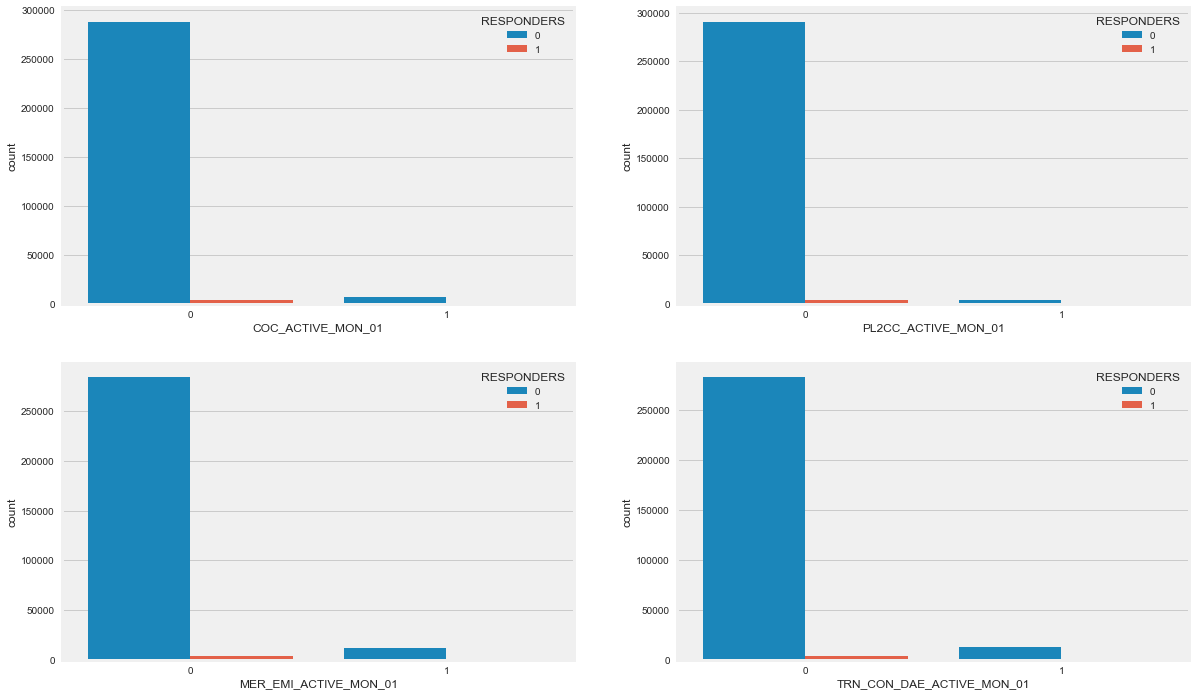

In [204]:
fig, ax = plt.subplots(2, 2, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(l) :
        sns.countplot(x=l[i],hue='RESPONDERS', data=train, ax=ax)

In [205]:
train['L_ACTIVE'] = 0
for col in l:
    train['L_ACTIVE'] += train[col]

In [206]:
test['L_ACTIVE'] = 0
for col in l:
    test['L_ACTIVE'] += test[col]

In [207]:
train.drop(l,axis=1,inplace=True)
test.drop(l,axis=1,inplace=True)


In [208]:
train.shape , test.shape

((300000, 260), (200000, 259))

In [209]:
l = ['COC_CLOSED_MON_01','PL2CC_CLOSED_MON_01','TRN_CON_DAE_CLOSED_MON_01']

In [210]:
for x in l:
    justYcol(x)
    print train[x].value_counts()

0    295013
1      4987
Name: COC_CLOSED_MON_01, dtype: int64
0    298712
1      1288
Name: PL2CC_CLOSED_MON_01, dtype: int64
0    286278
1     13722
Name: TRN_CON_DAE_CLOSED_MON_01, dtype: int64


In [211]:
train.drop('BTE_CLOSED_MON_01',axis=1,inplace=True)
test.drop('BTE_CLOSED_MON_01',axis=1,inplace=True)

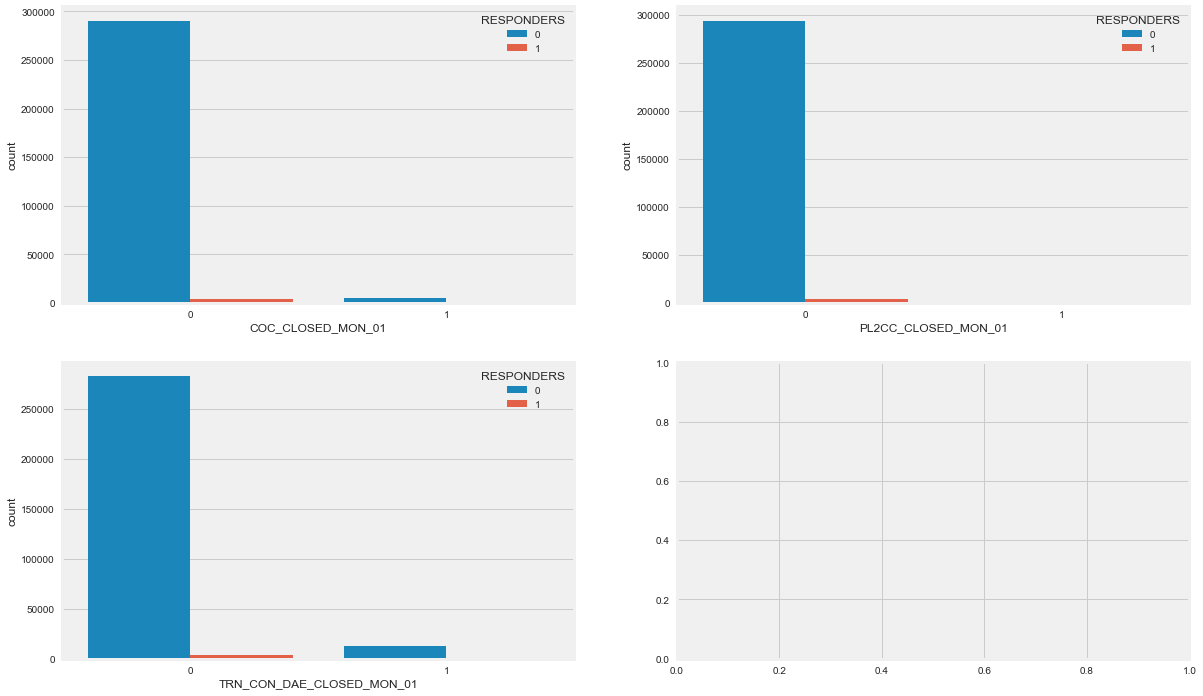

In [212]:
fig, ax = plt.subplots(2, 2, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(l) :
        sns.countplot(x=l[i],hue='RESPONDERS', data=train, ax=ax)

In [213]:
train['L_ACTIVE'] = 0
for col in l:
    train['L_ACTIVE'] += train[col]

In [214]:
test['L_ACTIVE'] = 0
for col in l:
    test['L_ACTIVE'] += test[col]

In [215]:
train.drop(l,axis=1,inplace=True)
test.drop(l,axis=1,inplace=True)

In [216]:
train.shape

(300000, 256)

count    3.000000e+05
mean     2.308295e+04
std      7.634927e+04
min     -2.675530e+06
25%      4.000000e+00
50%      2.048625e+03
75%      2.093449e+04
max      6.738966e+06
Name: EOP_BAL_MON_01, dtype: float64


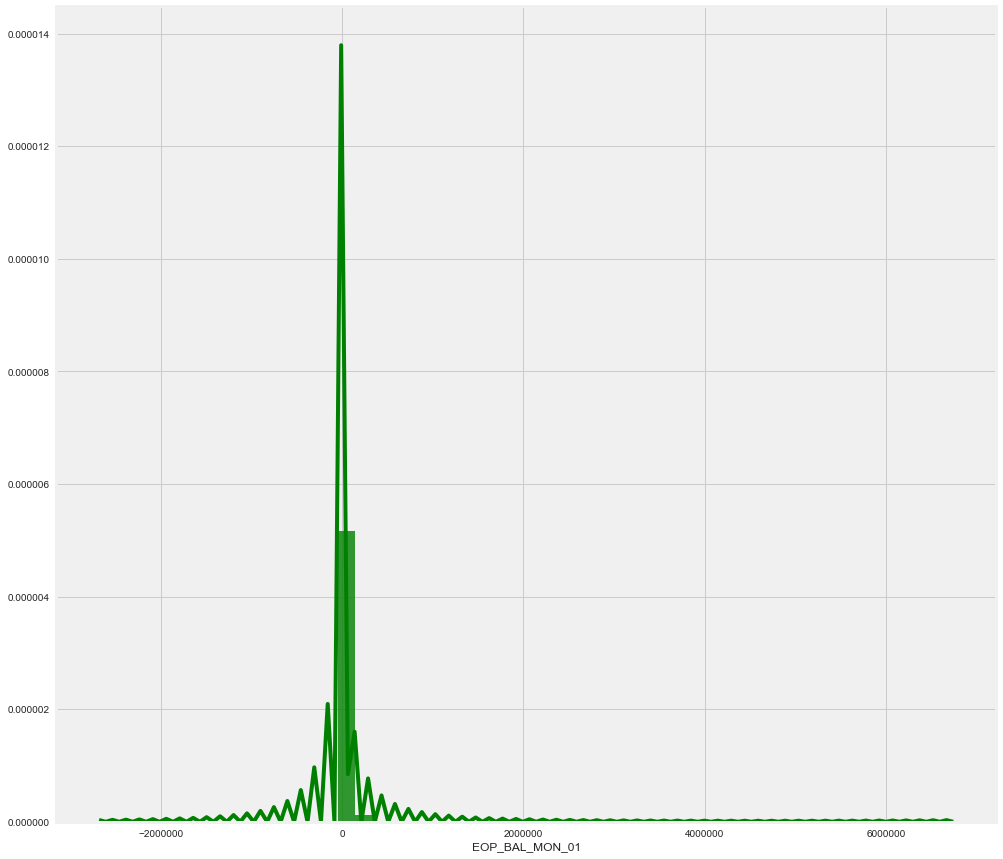

In [217]:

print(train['EOP_BAL_MON_01'].describe())
plt.figure(figsize=(15, 15))
sns.distplot(train['EOP_BAL_MON_01'], color='g', bins=50, hist_kws={'alpha': 0.8})
plt.show()

In [218]:
train['EOP_BAL_MON_01']=pd.cut(
    train['EOP_BAL_MON_01'],
    [-9999999 ,-5000,0,2500,7500,10000, 30000 , 60000,200000,9999999 ],
    labels=[1,2,3,4,5,6,7,8,9])

In [219]:
train['AMB_MON_03'].isnull().sum()

2778

In [220]:
(train['AMB_MON_03']==0).sum()

67381

In [221]:

# print(train['AMB_MON_02'].describe())
# plt.figure(figsize=(15, 15))
# sns.distplot(train['AMB_MON_02'], color='g', bins=50, hist_kws={'alpha': 0.8})
# plt.show()

In [222]:
train['AMB_MON_02'].fillna(-99999,inplace=True)

In [223]:
mean = train.loc[train['AMB_MON_02']!=-99999 ,'AMB_MON_02'].mean()

In [224]:
std = train.loc[train['AMB_MON_02']!=-99999 ,'AMB_MON_02'].std()

In [225]:
count = train.loc[train['AMB_MON_02']==-99999 ,'AMB_MON_02'].count()

In [226]:
 money_random_list = np.random.randint(mean - std/3, mean + std/3, size=count)

In [227]:
train.loc[train['AMB_MON_02']==-99999,'AMB_MON_02'] = money_random_list

In [228]:
test['AMB_MON_02'].fillna(-99999,inplace=True)
mean = test.loc[test['AMB_MON_02']!=-99999 ,'AMB_MON_02'].mean()
std = test.loc[test['AMB_MON_02']!=-99999 ,'AMB_MON_02'].std()
count = test.loc[test['AMB_MON_02']==-99999 ,'AMB_MON_02'].count()
money_random_list = np.random.randint(mean - std/3, mean + std/3, size=count)
test.loc[test['AMB_MON_02']==-99999,'AMB_MON_02'] = money_random_list

In [229]:
test['AMB_MON_03'].fillna(-99999,inplace=True)
mean = test.loc[test['AMB_MON_03']!=-99999 ,'AMB_MON_03'].mean()
std = test.loc[test['AMB_MON_03']!=-99999 ,'AMB_MON_03'].std()
count = test.loc[test['AMB_MON_03']==-99999 ,'AMB_MON_03'].count()
money_random_list = np.random.randint(mean - std/3, mean + std/3, size=count)
test.loc[test['AMB_MON_03']==-99999,'AMB_MON_03'] = money_random_list

In [230]:
train['AMB_MON_03'].fillna(-99999,inplace=True)
mean = train.loc[train['AMB_MON_03']!=-99999 ,'AMB_MON_03'].mean()
std = train.loc[train['AMB_MON_03']!=-99999 ,'AMB_MON_03'].std()
count = train.loc[train['AMB_MON_03']==-99999 ,'AMB_MON_03'].count()
money_random_list = np.random.randint(mean - std/3, mean + std/3, size=count)
train.loc[train['AMB_MON_03']==-99999,'AMB_MON_03'] = money_random_list

In [231]:
train['AMB_MON_04'].fillna(-99999,inplace=True)
mean = train.loc[train['AMB_MON_04']!=-99999 ,'AMB_MON_04'].mean()
std = train.loc[train['AMB_MON_04']!=-99999 ,'AMB_MON_04'].std()
count = train.loc[train['AMB_MON_04']==-99999 ,'AMB_MON_04'].count()
money_random_list = np.random.randint(mean - std/3, mean + std/3, size=count)
train.loc[train['AMB_MON_04']==-99999,'AMB_MON_04'] = money_random_list

In [232]:
test['AMB_MON_04'].fillna(-99999,inplace=True)
mean = test.loc[test['AMB_MON_04']!=-99999 ,'AMB_MON_04'].mean()
std = test.loc[test['AMB_MON_04']!=-99999 ,'AMB_MON_04'].std()
count = test.loc[test['AMB_MON_04']==-99999 ,'AMB_MON_04'].count()
money_random_list = np.random.randint(mean - std/3, mean + std/3, size=count)
test.loc[test['AMB_MON_04']==-99999,'AMB_MON_04'] = money_random_list

In [233]:
train['AMB'] = train['AMB_MON_01'] + train['AMB_MON_02'] + train['AMB_MON_03'] + train['AMB_MON_04']
test['AMB'] = test['AMB_MON_01'] + test['AMB_MON_02'] + test['AMB_MON_03'] + test['AMB_MON_04']

In [234]:
train.drop(['AMB_MON_01','AMB_MON_02','AMB_MON_03','AMB_MON_04'], axis=1 , inplace =True)
test.drop(['AMB_MON_01','AMB_MON_02','AMB_MON_03','AMB_MON_04'], axis=1 , inplace =True)

In [235]:
train['NB_MON_01_CNT'].fillna(0,inplace=True)
train['NB_MON_02_CNT'].fillna(0,inplace=True)
train['NB_MON_03_CNT'].fillna(0,inplace=True)

In [236]:
train['NB_MON_03_CNT'].value_counts()

0.0    187422
1.0    112578
Name: NB_MON_03_CNT, dtype: int64

In [237]:
train['NB'] = train['NB_MON_01_CNT'] + train['NB_MON_02_CNT'] + train['NB_MON_03_CNT']

In [238]:
train.drop(['NB_MON_01_CNT','NB_MON_02_CNT','NB_MON_03_CNT'],axis=1,inplace=True)

In [239]:
test['NB_MON_01_CNT'].fillna(0,inplace=True)
test['NB_MON_02_CNT'].fillna(0,inplace=True)
test['NB_MON_03_CNT'].fillna(0,inplace=True)
test['NB'] = test['NB_MON_01_CNT'] + test['NB_MON_02_CNT'] + test['NB_MON_03_CNT']
test.drop(['NB_MON_01_CNT','NB_MON_02_CNT','NB_MON_03_CNT'],axis=1,inplace=True)

In [240]:
train['CDMAT_MON_01'].fillna(0,inplace=True)
train['CDMAT_MON_04'].fillna(0,inplace=True)
test['CDMAT_MON_01'].fillna(0,inplace=True)
test['CDMAT_MON_04'].fillna(0,inplace=True)

In [241]:
train['MF_MON_01'].describe()

count    3.825000e+03
mean     7.536588e+04
std      5.436484e+05
min      8.025000e+01
25%      7.900000e+03
50%      2.000000e+04
75%      4.990000e+04
max      2.256244e+07
Name: MF_MON_01, dtype: float64

In [242]:
train['CDMAT_MON_01'].describe()

count    3.000000e+05
mean     1.561577e+04
std      8.437187e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.608527e+08
Name: CDMAT_MON_01, dtype: float64

In [243]:
train['MF_MON_01'].fillna(0,inplace=True)
train['MF_MON_04'].fillna(0,inplace=True)
test['MF_MON_01'].fillna(0,inplace=True)
test['MF_MON_04'].fillna(0,inplace=True)

In [244]:
train['RD_MON_01'].fillna(0,inplace=True)
train['RD_MON_04'].fillna(0,inplace=True)
test['RD_MON_01'].fillna(0,inplace=True)
test['RD_MON_04'].fillna(0,inplace=True)

In [245]:
train['FD_MON_01'].fillna(0,inplace=True)
train['FD_MON_04'].fillna(0,inplace=True)
test['FD_MON_01'].fillna(0,inplace=True)
test['FD_MON_04'].fillna(0,inplace=True)

In [246]:
train['LI_MON_01'].fillna(0,inplace=True)
train['LI_MON_04'].fillna(0,inplace=True)
test['LI_MON_01'].fillna(0,inplace=True)
test['LI_MON_04'].fillna(0,inplace=True)

In [247]:
train['GI_MON_01'].fillna(0,inplace=True)
train['GI_MON_04'].fillna(0,inplace=True)
test['GI_MON_01'].fillna(0,inplace=True)
test['GI_MON_04'].fillna(0,inplace=True)

In [248]:
train['CDMAT'] = train['CDMAT_MON_01'] + train['CDMAT_MON_04']
train['MF'] = train['MF_MON_01'] + train['MF_MON_04']
train['RD'] = train['RD_MON_01'] + train['RD_MON_04']
train['FD'] = train['FD_MON_01'] + train['FD_MON_04']
train['LI'] = train['LI_MON_01'] + train['LI_MON_04']
train['GI'] = train['GI_MON_01'] + train['GI_MON_04']


In [249]:
test['CDMAT'] = test['CDMAT_MON_01'] + test['CDMAT_MON_04']
test['MF'] = test['MF_MON_01'] + test['MF_MON_04']
test['RD'] = test['RD_MON_01'] + test['RD_MON_04']
test['FD'] = test['FD_MON_01'] + test['FD_MON_04']
test['LI'] = test['LI_MON_01'] + test['LI_MON_04']
test['GI'] = test['GI_MON_01'] + test['GI_MON_04']

In [250]:
l = ['MF_MON_01','MF_MON_04','LI_MON_01','LI_MON_04','GI_MON_04','GI_MON_01','FD_MON_01','FD_MON_04','RD_MON_04','RD_MON_01','CDMAT_MON_04','CDMAT_MON_01']

In [251]:
train.drop(l,axis=1,inplace=True)
test.drop(l,axis=1,inplace=True)

In [252]:
meancd = train.loc[train['CDMAT']>0 , 'CDMAT'].mean()
meanmf = train.loc[train['MF']>0 , 'MF'].mean()
meanrd = train.loc[train['RD']>0 , 'RD'].mean()
meanfd = train.loc[train['FD']>0 , 'FD'].mean()
meanli = train.loc[train['LI']>0 , 'LI'].mean()
meangi = train.loc[train['GI']>0 , 'GI'].mean()

In [253]:
meancd , meanmf , meanrd , meanfd , meanli , meangi

(1715102.6142367662,
 147624.55330196087,
 80436.66599067126,
 280639.9013382699,
 73506.88828164634,
 4187.310472663378)

# Combine all investments using weights ?

In [254]:
l = ['CC_TXN_MON_01','CC_TXN_MON_02','CC_TXN_MON_03','CC_TXN_MON_04','CC_TXN_MON_05','CC_TXN_MON_06']

In [255]:
for x in l:
    train[x].fillna(0,inplace=True)
    test[x].fillna(0,inplace=True)

In [256]:
train['CC_TXN'] = 0
test['CC_TXN'] = 0
for x in l :
    train['CC_TXN'] += train[x]
    test["CC_TXN"] += test[x]
    

In [257]:
train.drop(l,axis=1,inplace=True)
test.drop(l,axis=1,inplace=True)

In [258]:
l=['DC_TXN_MON_01','DC_TXN_MON_02','DC_TXN_MON_03','DC_TXN_MON_04','DC_TXN_MON_05', 'DC_TXN_MON_06']

In [259]:
for x in l:
    train[x].fillna(0,inplace=True)
    test[x].fillna(0,inplace=True)

In [260]:
train['DC_TXN'] = 0
test['DC_TXN'] = 0
for x in l :
    train['DC_TXN'] += train[x]
    test["DC_TXN"] += test[x]
    

In [261]:
train.drop(l,axis=1,inplace=True)
test.drop(l,axis=1,inplace=True)

In [262]:
train.shape , test.shape

((300000, 235), (200000, 234))

In [263]:
l = ['DC_SPEND_MON_05_ENT','DC_SPEND_MON_04_ENT','DC_SPEND_MON_03_ENT','DC_SPEND_MON_02_ENT','DC_SPEND_MON_01_ENT']

In [264]:
for x in l:
    train[x].fillna(0,inplace=True)
    test[x].fillna(0,inplace=True)

In [265]:
train['DC_ENT'] = 0
test['DC_ENT'] = 0
for x in l:
    train['DC_ENT'] += train[x]
    test['DC_ENT'] += test[x]

In [266]:
train.drop(l,axis=1,inplace=True)
test.drop(l,axis=1,inplace=True)

In [267]:
l = ['DC_SPEND_MON_05_MED','DC_SPEND_MON_04_MED','DC_SPEND_MON_03_MED','DC_SPEND_MON_02_MED','DC_SPEND_MON_01_MED']

In [268]:
for x in l:
    print train[x].value_counts()

500.00      158
300.00      128
200.00      126
1000.00     121
400.00      111
100.00       97
2000.00      74
250.00       72
600.00       71
1500.00      57
150.00       57
700.00       56
450.00       53
800.00       48
1200.00      47
110.00       43
550.00       41
350.00       40
170.00       39
180.00       38
230.00       36
120.00       34
2500.00      34
140.00       33
1100.00      32
160.00       31
4000.00      31
900.00       31
125.00       30
80.00        29
           ... 
25346.00      1
3167.00       1
1215.00       1
3165.00       1
2325.30       1
239.90        1
1581.00       1
295.90        1
947.35        1
3179.00       1
1858.00       1
3195.00       1
106.50        1
3193.00       1
880.00        1
7580.00       1
18702.60      1
147.80        1
15175.60      1
12746.00      1
3466.00       1
1171.85       1
6370.00       1
50952.00      1
24000.00      1
1591.00       1
6363.00       1
6362.00       1
267.38        1
6030.00       1
Name: DC_SPEND_MON_05_ME

In [269]:
for x in l:
    train[x].fillna(0,inplace=True)
    test[x].fillna(0,inplace=True)
    
train['DC_MED'] = 0
test['DC_MED'] = 0
for x in l:
    train['DC_MED'] += train[x]
    test['DC_MED'] += test[x]
    
train.drop(l,axis=1,inplace=True)
test.drop(l,axis=1,inplace=True)

In [270]:
l = ['DC_SPEND_MON_04_GRC']

In [271]:
for x in l:
    train[x].fillna(0,inplace=True)
    test[x].fillna(0,inplace=True)
    
train['DC_GRC'] = 0
test['DC_GRC'] = 0
for x in l:
    train['DC_GRC'] += train[x]
    test['DC_GRC'] += test[x]
    
train.drop(l,axis=1,inplace=True)
test.drop(l,axis=1,inplace=True)

In [272]:
l = ['DC_SPEND_MON_05_HMD','DC_SPEND_MON_04_HMD','DC_SPEND_MON_03_HMD','DC_SPEND_MON_02_HMD','DC_SPEND_MON_01_HMD']

In [273]:
for x in l:
    train[x].fillna(0,inplace=True)
    test[x].fillna(0,inplace=True)
    
train['DC_HMD'] = 0
test['DC_HMD'] = 0
for x in l:
    train['DC_HMD'] += train[x]
    test['DC_HMD'] += test[x]
    
train.drop(l,axis=1,inplace=True)
test.drop(l,axis=1,inplace=True)

In [274]:
l = ['DC_SPEND_MON_05_HBY','DC_SPEND_MON_04_HBY','DC_SPEND_MON_03_HBY','DC_SPEND_MON_02_HBY','DC_SPEND_MON_01_HBY']

In [275]:
for x in l:
    train[x].fillna(0,inplace=True)
    test[x].fillna(0,inplace=True)
    
train['DC_HBY'] = 0
test['DC_HBY'] = 0
for x in l:
    train['DC_HBY'] += train[x]
    test['DC_HBY'] += test[x]
    
train.drop(l,axis=1,inplace=True)
test.drop(l,axis=1,inplace=True)

In [276]:
l = ['DC_SPEND_MON_05_CARE','DC_SPEND_MON_04_CARE','DC_SPEND_MON_03_CARE','DC_SPEND_MON_02_CARE','DC_SPEND_MON_01_CARE']

In [277]:
for x in l:
    train[x].fillna(0,inplace=True)
    test[x].fillna(0,inplace=True)
    
train['DC_CARE'] = 0
test['DC_CARE'] = 0
for x in l:
    train['DC_CARE'] += train[x]
    test['DC_CARE'] += test[x]
    
train.drop(l,axis=1,inplace=True)
test.drop(l,axis=1,inplace=True)

In [278]:
l = ['DC_SPEND_MON_05_TRL','DC_SPEND_MON_04_TRL','DC_SPEND_MON_03_TRL','DC_SPEND_MON_02_TRL','DC_SPEND_MON_01_TRL']

In [279]:
for x in l:
    train[x].fillna(0,inplace=True)
    test[x].fillna(0,inplace=True)
    
train['DC_TRL'] = 0
test['DC_TRL'] = 0
for x in l:
    train['DC_TRL'] += train[x]
    test['DC_TRL'] += test[x]
    
train.drop(l,axis=1,inplace=True)
test.drop(l,axis=1,inplace=True)

In [280]:
l = ['DC_SPEND_MON_05_RST','DC_SPEND_MON_04_RST','DC_SPEND_MON_03_RST','DC_SPEND_MON_02_RST','DC_SPEND_MON_01_RST']

In [281]:
for x in l:
    train[x].fillna(0,inplace=True)
    test[x].fillna(0,inplace=True)
    
train['DC_RST'] = 0
test['DC_RST'] = 0
for x in l:
    train['DC_RST'] += train[x]
    test['DC_RST'] += test[x]
    
train.drop(l,axis=1,inplace=True)
test.drop(l,axis=1,inplace=True)

In [282]:
l = ['DC_SPEND_MON_05_JER','DC_SPEND_MON_04_JER','DC_SPEND_MON_03_JER','DC_SPEND_MON_02_JER','DC_SPEND_MON_01_JER']

In [283]:
for x in l:
    train[x].fillna(0,inplace=True)
    test[x].fillna(0,inplace=True)
    
train['DC_JER'] = 0
test['DC_JER'] = 0
for x in l:
    train['DC_JER'] += train[x]
    test['DC_JER'] += test[x]
    
train.drop(l,axis=1,inplace=True)
test.drop(l,axis=1,inplace=True)

In [284]:
l = ['DC_SPEND_MON_05_ATM','DC_SPEND_MON_04_ATM','DC_SPEND_MON_03_ATM','DC_SPEND_MON_02_ATM','DC_SPEND_MON_01_ATM']

In [285]:
for x in l:
    train[x].fillna(0,inplace=True)
    test[x].fillna(0,inplace=True)
    
train['DC_ATM'] = 0
test['DC_ATM'] = 0
for x in l:
    train['DC_ATM'] += train[x]
    test['DC_ATM'] += test[x]
    
train.drop(l,axis=1,inplace=True)
test.drop(l,axis=1,inplace=True)

In [286]:
l = ['DC_SPEND_MON_05_HTL','DC_SPEND_MON_04_HTL','DC_SPEND_MON_03_HTL','DC_SPEND_MON_02_HTL','DC_SPEND_MON_01_HTL']

In [287]:
for x in l:
    train[x].fillna(0,inplace=True)
    test[x].fillna(0,inplace=True)
    
train['DC_HTL'] = 0
test['DC_HTL'] = 0
for x in l:
    train['DC_HTL'] += train[x]
    test['DC_HTL'] += test[x]
    
train.drop(l,axis=1,inplace=True)
test.drop(l,axis=1,inplace=True)

In [288]:
train.shape , test.shape

((300000, 195), (200000, 194))

In [289]:
l = ['CC_SPEND_MON_04_ENT','CC_SPEND_MON_03_ENT','CC_SPEND_MON_02_ENT','CC_SPEND_MON_01_ENT']

In [290]:
for x in l:
    print train[x].describe()

count      7275.000000
mean       1515.774448
std        4308.554012
min           1.000000
25%         339.260000
50%         650.000000
75%        1329.500000
max      174000.000000
Name: CC_SPEND_MON_04_ENT, dtype: float64
count      7342.000000
mean       1487.362667
std        4824.610839
min           1.000000
25%         336.125000
50%         609.520000
75%        1277.520000
max      200500.000000
Name: CC_SPEND_MON_03_ENT, dtype: float64
count      6311.000000
mean       1428.565421
std        4252.550402
min           1.000000
25%         320.000000
50%         600.000000
75%        1167.885000
max      120000.000000
Name: CC_SPEND_MON_02_ENT, dtype: float64
count      7252.000000
mean       1611.094368
std        5345.584928
min           0.670000
25%         345.000000
50%         650.000000
75%        1387.445000
max      200000.000000
Name: CC_SPEND_MON_01_ENT, dtype: float64


In [291]:
for x in l:
    train[x].fillna(0,inplace=True)
    test[x].fillna(0,inplace=True)
    
train['CC_ENT'] = 0
test['CC_ENT'] = 0
for x in l:
    train['CC_ENT'] += train[x]
    test['CC_ENT'] += test[x]
    
train.drop(l,axis=1,inplace=True)
test.drop(l,axis=1,inplace=True)

In [292]:
l = ['CC_SPEND_MON_04_MED','CC_SPEND_MON_03_MED','CC_SPEND_MON_02_MED','CC_SPEND_MON_01_MED']

In [293]:
for x in l:
    train[x].fillna(0,inplace=True)
    test[x].fillna(0,inplace=True)
    
train['CC_MED'] = 0
test['CC_MED'] = 0
for x in l:
    train['CC_MED'] += train[x]
    test['CC_MED'] += test[x]
    
train.drop(l,axis=1,inplace=True)
test.drop(l,axis=1,inplace=True)

In [294]:
l = ['CC_SPEND_MON_04_HMD','CC_SPEND_MON_03_HMD','CC_SPEND_MON_02_HMD','CC_SPEND_MON_01_HMD']

In [295]:
for x in l:
    train[x].fillna(0,inplace=True)
    test[x].fillna(0,inplace=True)
    
train['CC_HMD'] = 0
test['CC_HMD'] = 0
for x in l:
    train['CC_HMD'] += train[x]
    test['CC_HMD'] += test[x]
    
train.drop(l,axis=1,inplace=True)
test.drop(l,axis=1,inplace=True)

In [296]:
l = ['CC_SPEND_MON_04_HBY','CC_SPEND_MON_03_HBY','CC_SPEND_MON_02_HBY','CC_SPEND_MON_01_HBY']

In [297]:
for x in l:
    train[x].fillna(0,inplace=True)
    test[x].fillna(0,inplace=True)
    
train['CC_HBY'] = 0
test['CC_HBY'] = 0
for x in l:
    train['CC_HBY'] += train[x]
    test['CC_HBY'] += test[x]
    
train.drop(l,axis=1,inplace=True)
test.drop(l,axis=1,inplace=True)

In [298]:
l = ['CC_SPEND_MON_04_CARE','CC_SPEND_MON_03_CARE','CC_SPEND_MON_02_CARE','CC_SPEND_MON_01_CARE']

In [299]:
for x in l:
    train[x].fillna(0,inplace=True)
    test[x].fillna(0,inplace=True)
    
train['CC_CARE'] = 0
test['CC_CARE'] = 0
for x in l:
    train['CC_CARE'] += train[x]
    test['CC_CARE'] += test[x]
    
train.drop(l,axis=1,inplace=True)
test.drop(l,axis=1,inplace=True)

In [300]:
l = ['CC_SPEND_MON_04_TRL','CC_SPEND_MON_03_TRL','CC_SPEND_MON_02_TRL','CC_SPEND_MON_01_TRL']

In [301]:
for x in l:
    train[x].fillna(0,inplace=True)
    test[x].fillna(0,inplace=True)
    
train['CC_TRL'] = 0
test['CC_TRL'] = 0
for x in l:
    train['CC_TRL'] += train[x]
    test['CC_TRL'] += test[x]
    
train.drop(l,axis=1,inplace=True)
test.drop(l,axis=1,inplace=True)

In [302]:
l = ['CC_SPEND_MON_04_RST','CC_SPEND_MON_03_RST','CC_SPEND_MON_02_RST','CC_SPEND_MON_01_RST']

In [303]:
for x in l:
    train[x].fillna(0,inplace=True)
    test[x].fillna(0,inplace=True)
    
train['CC_RST'] = 0
test['CC_RST'] = 0
for x in l:
    train['CC_RST'] += train[x]
    test['CC_RST'] += test[x]
    
train.drop(l,axis=1,inplace=True)
test.drop(l,axis=1,inplace=True)

In [304]:
l = ['CC_SPEND_MON_04_JER','CC_SPEND_MON_03_JER','CC_SPEND_MON_02_JER','CC_SPEND_MON_01_JER']

In [305]:
for x in l:
    train[x].fillna(0,inplace=True)
    test[x].fillna(0,inplace=True)
    
train['CC_JER'] = 0
test['CC_JER'] = 0
for x in l:
    train['CC_JER'] += train[x]
    test['CC_JER'] += test[x]
    
train.drop(l,axis=1,inplace=True)
test.drop(l,axis=1,inplace=True)

In [306]:
l = ['CC_SPEND_MON_04_ATM','CC_SPEND_MON_03_ATM','CC_SPEND_MON_02_ATM','CC_SPEND_MON_01_ATM']

In [307]:
for x in l:
    train[x].fillna(0,inplace=True)
    test[x].fillna(0,inplace=True)
    
train['CC_ATM'] = 0
test['CC_ATM'] = 0
for x in l:
    train['CC_ATM'] += train[x]
    test['CC_ATM'] += test[x]
    
train.drop(l,axis=1,inplace=True)
test.drop(l,axis=1,inplace=True)

In [308]:
l = ['CC_SPEND_MON_04_HTL','CC_SPEND_MON_03_HTL','CC_SPEND_MON_02_HTL','CC_SPEND_MON_01_HTL']

In [309]:
for x in l:
    train[x].fillna(0,inplace=True)
    test[x].fillna(0,inplace=True)
    
train['CC_HTL'] = 0
test['CC_HTL'] = 0
for x in l:
    train['CC_HTL'] += train[x]
    test['CC_HTL'] += test[x]
    
train.drop(l,axis=1,inplace=True)
test.drop(l,axis=1,inplace=True)

In [310]:
train.shape , test.shape

((300000, 165), (200000, 164))

In [311]:

justYcol('FINANCE_MON_01')

In [312]:
train['FINANCE_MON_01'].value_counts()

0    261465
1     38535
Name: FINANCE_MON_01, dtype: int64

In [313]:
l = ['LIFESTYLE_MON_01','JOBS_MON_01','INMON_01KET_MON_01','TRAVEL_MON_01']

In [314]:
for x in l:
    justYcol(x)

In [315]:
train['CHANNEL_CLICK_DISP'].value_counts()

NONE     221691
DISP      73572
CLICK      4737
Name: CHANNEL_CLICK_DISP, dtype: int64

In [316]:
train['CHANNEL_CLICK_DISP'] = train['CHANNEL_CLICK_DISP'].map({'NONE':0, 'DISP':1,'CLICK':2}).astype(int)

In [317]:
test['CHANNEL_CLICK_DISP'] = test['CHANNEL_CLICK_DISP'].map({'NONE':0, 'DISP':1,'CLICK':2}).astype(int)

In [318]:
test['DESIGNATION_FINAL'].value_counts()

MISSING                    155313
EXECUTIVE                    7570
OTHERS                       6750
MANAGER                      6085
ENGINEER                     5379
OFFICER                      4919
DEVEP/PROG/ANALYST/ASSO      4385
REMAING                      4377
SUP/TECH/OPR                 2682
TEACH/PROF/CONSULT           2200
TOP_MANAG/DOC                 340
Name: DESIGNATION_FINAL, dtype: int64

In [319]:
train['DESIGNATION_FINAL'] = train['DESIGNATION_FINAL'].map({'MISSING':0, 'EXECUTIVE':1,'OTHERS':2,'MANAGER':3,'ENGINEER':4,'OFFICER':5,'DEVEP/PROG/ANALYST/ASSO':6,'REMAING':7,'SUP/TECH/OPR':8,'TEACH/PROF/CONSULT':9,'TOP_MANAG/DOC':10}).astype(int)

In [320]:
test['DESIGNATION_FINAL'] = test['DESIGNATION_FINAL'].map({'MISSING':0, 'EXECUTIVE':1,'OTHERS':2,'MANAGER':3,'ENGINEER':4,'OFFICER':5,'DEVEP/PROG/ANALYST/ASSO':6,'REMAING':7,'SUP/TECH/OPR':8,'TEACH/PROF/CONSULT':9,'TOP_MANAG/DOC':10}).astype(int)

In [321]:
train['PL2CC_ELIGIBLE'].value_counts()

0    282230
1     17770
Name: PL2CC_ELIGIBLE, dtype: int64

In [322]:
justYcol('TOP9_CITY')
justYcol('TOP14_CITY')

In [323]:
train['TOP10_14_CITY']= train['TOP14_CITY']-train['TOP9_CITY']

In [324]:
test['TOP10_14_CITY']= test['TOP14_CITY']-test['TOP9_CITY']

In [325]:
train.drop('TOP14_CITY',axis=1,inplace=True)
test.drop('TOP14_CITY',axis=1,inplace=True)

In [326]:
l = ['D_AMT_L3_MON_06','D_AMT_L3_MON_05','D_AMT_L3_MON_04','D_AMT_L3_MON_03','D_AMT_L3_MON_02','D_AMT_L3_MON_01']

In [327]:
for x in l:
    print train[x].describe()
    print train[x].isnull().sum()
    print train.loc[train[x]==0,x].count()

count    1.895200e+05
mean     3.818116e+04
std      8.058752e+05
min      0.000000e+00
25%      5.458030e+03
50%      1.818791e+04
75%      3.884564e+04
max      3.461540e+08
Name: D_AMT_L3_MON_06, dtype: float64
110480
6
count    1.705820e+05
mean     3.678915e+04
std      2.101454e+05
min      0.000000e+00
25%      7.000000e+03
50%      1.725000e+04
75%      3.751975e+04
max      4.941053e+07
Name: D_AMT_L3_MON_05, dtype: float64
129418
37
count    1.761190e+05
mean     4.237452e+04
std      2.698734e+05
min      0.000000e+00
25%      9.050000e+03
50%      2.141992e+04
75%      4.552441e+04
max      7.411256e+07
Name: D_AMT_L3_MON_04, dtype: float64
123881
20
count    1.958020e+05
mean     3.907467e+04
std      6.599098e+05
min      0.000000e+00
25%      6.017062e+03
50%      1.763113e+04
75%      3.967085e+04
max      2.796595e+08
Name: D_AMT_L3_MON_03, dtype: float64
104198
11
count    1.770540e+05
mean     4.005691e+04
std      1.750195e+05
min      0.000000e+00
25%      8.621735

In [328]:
for x in l:
    train[x].fillna(0,inplace=True)
    test[x].fillna(0,inplace=True)

In [329]:
train['D_AMT'] = 0
test['D_AMT'] = 0
for x in l:
    train['D_AMT'] += train[x]
    test['D_AMT'] += test[x]
    
train.drop(l , axis=1 , inplace=True)
test.drop(l , axis=1 , inplace=True)


In [330]:
l = ['C_AMT_L3_MON_06','C_AMT_L3_MON_05','C_AMT_L3_MON_04','C_AMT_L3_MON_03','C_AMT_L3_MON_02','C_AMT_L3_MON_01']

In [331]:
for x in l:
    print train[x].describe()
    print train[x].isnull().sum()
    print train.loc[train[x]==0,x].count()

count    1.605750e+05
mean     4.687756e+04
std      8.768490e+05
min      0.000000e+00
25%      1.235000e+04
50%      2.484400e+04
75%      4.571547e+04
max      3.464439e+08
Name: C_AMT_L3_MON_06, dtype: float64
139425
4
count    1.589230e+05
mean     4.847829e+04
std      2.198803e+05
min      0.000000e+00
25%      1.057200e+04
50%      2.400000e+04
75%      5.003800e+04
max      4.941053e+07
Name: C_AMT_L3_MON_05, dtype: float64
141077
3
count    2.142860e+05
mean     3.588161e+04
std      2.471094e+05
min      0.000000e+00
25%      9.960000e+02
50%      1.578038e+04
75%      3.820665e+04
max      7.411401e+07
Name: C_AMT_L3_MON_04, dtype: float64
85714
1
count    1.645840e+05
mean     4.499495e+04
std      7.202216e+05
min      0.000000e+00
25%      1.000150e+04
50%      2.104600e+04
75%      4.301431e+04
max      2.796583e+08
Name: C_AMT_L3_MON_03, dtype: float64
135416
2
count    1.665570e+05
mean     4.268753e+04
std      1.813893e+05
min      0.000000e+00
25%      1.020500e+04

In [332]:
for x in l:
    train[x].fillna(0,inplace=True)
    test[x].fillna(0,inplace=True)

In [333]:
train['C_AMT'] = 0
test['C_AMT'] = 0
for x in l:
    train['C_AMT'] += train[x]
    test['C_AMT'] += test[x]
    
train.drop(l , axis=1 , inplace=True)
test.drop(l , axis=1 , inplace=True)


In [334]:
train.shape , test.shape

((300000, 155), (200000, 154))

In [335]:
l = ['D_COUNT_L3_MON_06','D_COUNT_L3_MON_05','D_COUNT_L3_MON_04','D_COUNT_L3_MON_03','D_COUNT_L3_MON_02','D_COUNT_L3_MON_01']

In [336]:
for x in l:
    print train[x].describe()
    print train[x].isnull().sum()
    print train.loc[train[x]==0,x].count()

count    194043.000000
mean          9.766608
std          10.289201
min           0.000000
25%           2.000000
50%           6.000000
75%          14.000000
max         388.000000
Name: D_COUNT_L3_MON_06, dtype: float64
105957
4523
count    180189.000000
mean          9.588316
std          10.289608
min           0.000000
25%           2.000000
50%           6.000000
75%          13.000000
max         518.000000
Name: D_COUNT_L3_MON_05, dtype: float64
119811
9607
count    215344.000000
mean          9.970238
std          11.887906
min           0.000000
25%           1.000000
50%           6.000000
75%          14.000000
max         519.000000
Name: D_COUNT_L3_MON_04, dtype: float64
84656
39225
count    200536.000000
mean         10.383393
std          10.897397
min           0.000000
25%           3.000000
50%           7.000000
75%          15.000000
max         486.000000
Name: D_COUNT_L3_MON_03, dtype: float64
99464
4734
count    185415.000000
mean          9.642143
std        

In [338]:
l = ['C_COUNT_L3_MON_06','C_COUNT_L3_MON_05','C_COUNT_L3_MON_04','C_COUNT_L3_MON_03','C_COUNT_L3_MON_02','C_COUNT_L3_MON_01']

In [339]:
for x in l:
    print train[x].describe()
    print train[x].isnull().sum()
    print train.loc[train[x]==0,x].count()

count    194043.000000
mean          2.334225
std           2.654452
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max         267.000000
Name: C_COUNT_L3_MON_06, dtype: float64
105957
33468
count    180189.000000
mean          2.569341
std           2.959300
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max         185.000000
Name: C_COUNT_L3_MON_05, dtype: float64
119811
21266
count    215344.000000
mean          3.632221
std           3.544107
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max         312.000000
Name: C_COUNT_L3_MON_04, dtype: float64
84656
1058
count    200536.000000
mean          2.794551
std           3.571297
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max         195.000000
Name: C_COUNT_L3_MON_03, dtype: float64
99464
35952
count    185415.000000
mean          2.915444
std      

In [340]:
l = ['MAX_C_AMT_L3_MON_06','MAX_C_AMT_L3_MON_05','MAX_C_AMT_L3_MON_04','MAX_C_AMT_L3_MON_03','MAX_C_AMT_L3_MON_02','MAX_C_AMT_L3_MON_01']

In [341]:
for x in l:
    print train[x].describe()
    print train[x].isnull().sum()
    print train.loc[train[x]==0,x].count()

count    1.605750e+05
mean     3.091343e+04
std      6.274179e+05
min      3.000000e-02
25%      9.855500e+03
50%      1.736600e+04
75%      3.038250e+04
max      2.500000e+08
Name: MAX_C_AMT_L3_MON_06, dtype: float64
139425
0
count    1.589230e+05
mean     3.303929e+04
std      1.107891e+05
min      1.000000e-02
25%      9.500000e+03
50%      1.900000e+04
75%      3.601600e+04
max      3.000000e+07
Name: MAX_C_AMT_L3_MON_05, dtype: float64
141077
0
count    2.142860e+05
mean     2.333009e+04
std      1.014604e+05
min      4.000000e-02
25%      8.500000e+02
50%      1.223700e+04
75%      2.610600e+04
max      3.750000e+07
Name: MAX_C_AMT_L3_MON_04, dtype: float64
85714
0
count    1.645840e+05
mean     2.965492e+04
std      1.451342e+05
min      1.000000e-02
25%      8.848000e+03
50%      1.666050e+04
75%      3.026700e+04
max      5.000000e+07
Name: MAX_C_AMT_L3_MON_03, dtype: float64
135416
0
count    1.665570e+05
mean     2.986173e+04
std      7.947872e+04
min      1.000000e-02
25%  

In [342]:
for x in l:
    train[x].fillna(0,inplace=True)
    test[x].fillna(0,inplace=True)

In [344]:
train['MAX_C_AMT']=  train[l].max(axis=1)
train['MIN_MAX_C_AMT'] = train[l].min(axis=1)

In [345]:
test['MAX_C_AMT']=  test[l].max(axis=1)
test['MIN_MAX_C_AMT'] = test[l].min(axis=1)

In [346]:
train.drop(l,axis=1,inplace=True)
test.drop(l,axis=1,inplace=True)

In [363]:
test['PA_PQ_TAG'].fillna('NOT GIVEN',inplace=True)

In [373]:
train['PA_PQ_TAG'].fillna('NOT GIVEN',inplace=True)

In [383]:
key =train['PA_PQ_TAG'].value_counts().index.astype(str)
value = range(141)

In [384]:
dic = dict(zip(key, value))

In [385]:
train['PA_PQ_TAG']=train['PA_PQ_TAG'].map(dic).astype(int)

In [386]:
key

Index([u'NOT GIVEN', u'Green Channel', u'STP', u'PQ_WITH_INCOME_15K',
       u'PQ with Ref dedupe', u'PQ with Neg dedupe', u'PQ with Dedupe',
       u'PQ with Account', u'PQ with KYC', u'PQ_WITH_INCOME_16K',
       ...
       u'PQ_WITH_INCOME_1000K', u'PQ_WITH_INCOME_300K', u'PQ_WITH_INCOME_112K',
       u'PQ_WITH_INCOME_625K', u'PQ_WITH_INCOME_241K', u'PQ_WITH_INCOME_2000K',
       u'PQ_WITH_INCOME_120K', u'PQ_WITH_INCOME_247K', u'PQ_WITH_INCOME_107K',
       u'PQ_WITH_INCOME_192K'],
      dtype='object', length=141)

In [364]:
key

Index([u'NOT GIVEN', u'Green Channel', u'STP', u'PQ_WITH_INCOME_15K',
       u'PQ with Ref dedupe', u'PQ with Neg dedupe', u'PQ with Dedupe',
       u'PQ with Account', u'PQ with KYC', u'PQ_WITH_INCOME_16K',
       ...
       u'PQ_WITH_INCOME_136K', u'PQ_WITH_INCOME_317K', u'PQ_WITH_INCOME_133K',
       u'PQ_WITH_INCOME_185K', u'PQ_WITH_INCOME_113K', u'PQ_WITH_INCOME_600K',
       u'PQ_WITH_INCOME_91K', u'PQ_WITH_INCOME_130K', u'PQ_WITH_INCOME_4167K',
       u'PQ_WITH_INCOME_158K'],
      dtype='object', length=127)

In [362]:
key =test['PA_PQ_TAG'].value_counts().index.astype(str)
value = range(127)

In [365]:
dic = dict(zip(key, value))

In [368]:
test['PA_PQ_TAG']=test['PA_PQ_TAG'].map(dic).astype(int)

In [387]:
train['PA_PQ_TAG'].value_counts()

0      170815
1       62884
2       54322
3        2907
4        1099
5         856
6         729
7         588
8         367
9         307
10        279
11        270
12        260
13        252
14        245
15        225
16        194
18        187
17        187
19        171
20        166
21        149
22        144
23        139
24        129
25        129
26        113
27        111
28        101
29        100
        ...  
108         2
106         2
104         2
103         2
102         2
101         2
100         2
107         2
134         1
131         1
132         1
133         1
138         1
135         1
136         1
137         1
129         1
130         1
139         1
128         1
127         1
126         1
125         1
124         1
123         1
122         1
121         1
120         1
119         1
140         1
Name: PA_PQ_TAG, Length: 141, dtype: int64

In [388]:
test['PA_PQ_TAG'].value_counts()

0      113998
1       41856
2       36447
3        1829
4         710
5         547
6         467
7         376
8         249
9         194
10        190
11        181
12        172
13        164
14        157
15        152
16        134
17        110
18        110
19        104
20        104
21         98
22         87
23         86
24         84
25         83
26         83
27         76
28         73
29         68
        ...  
113         1
114         1
115         1
116         1
117         1
119         1
120         1
121         1
122         1
123         1
124         1
110         1
111         1
125         1
109         1
108         1
107         1
106         1
105         1
104         1
103         1
102         1
101         1
100         1
99          1
98          1
97          1
96          1
95          1
126         1
Name: PA_PQ_TAG, Length: 127, dtype: int64

In [369]:
l = ['NEFT_CC_AMOUNT','NEFT_CC_TXN','NEFT_CC_CATEGORY']

In [371]:
for x in l:
    print train[x].describe()
    print train[x].isnull().sum()
    print train.loc[train[x]==0,x].count()

count    4.489200e+04
mean     3.697836e+04
std      3.981169e+05
min      1.000000e+00
25%      6.000000e+03
50%      1.560100e+04
75%      3.500000e+04
max      8.002650e+07
Name: NEFT_CC_AMOUNT, dtype: float64
255108
0
count    44892.000000
mean         1.649693
std          1.328352
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         38.000000
Name: NEFT_CC_TXN, dtype: float64
255108
0
count          300000
unique             20
top       NO_NEFT_TXN
freq           255108
Name: NEFT_CC_CATEGORY, dtype: object
0
0


In [372]:
for x in l:
    train[x].fillna(0,inplace=True)
    test[x].fillna(0,inplace=True)

In [389]:
key =test['NEFT_CC_CATEGORY'].value_counts().index.astype(str)
value = range(20)

In [390]:
dic = dict(zip(key, value))

In [391]:
test['NEFT_CC_CATEGORY']=test['NEFT_CC_CATEGORY'].map(dic).astype(int)

In [396]:
key =train['NEFT_CC_CATEGORY'].value_counts().index.astype(str)
value = range(20)

In [399]:
dic = dict(zip(key, value))

In [400]:
train['NEFT_CC_CATEGORY']=train['NEFT_CC_CATEGORY'].map(dic).astype(int)

In [401]:
l = ['NEFT_DC_AMOUNT','NEFT_DC_TXN','NEFT_DC_CATEGORY']

In [402]:
for x in l:
    train[x].fillna(0,inplace=True)
    test[x].fillna(0,inplace=True)

In [403]:
key =test['NEFT_DC_CATEGORY'].value_counts().index.astype(str)
value = range(20)

In [404]:
dic = dict(zip(key, value))

In [406]:
test['NEFT_DC_CATEGORY']=test['NEFT_DC_CATEGORY'].map(dic).astype(int)

In [412]:
key =train['NEFT_DC_CATEGORY'].value_counts().index.astype(str)
value = range(20)

In [414]:
train['NEFT_DC_CATEGORY'].value_counts()

NO_NEFT_TXN     266040
NOT_RELEVANT     30457
LOAN              2721
EDUCATION          186
RENT               163
TRAVEL             111
BUILDER             77
JEWELLERY           49
MEDICAL             44
PERSONAL            40
EMI                 34
GAS                 24
CC_PAYMENT          20
TRANSFER            16
HELP                 4
CHILD_BIR            4
ELECTRICI            4
WEDDING              3
RETURN               2
OPERATION            1
Name: NEFT_DC_CATEGORY, dtype: int64

In [415]:
dic = dict(zip(key, value))

In [416]:
train['NEFT_DC_CATEGORY']=train['NEFT_DC_CATEGORY'].map(dic).astype(int)

In [419]:
l = ['TPT_DC_TXN_MON_01','TPT_DC_AMOUNT_MON_01','TPT_DC_CATEGORY_MON_01']

In [420]:
for x in l:
    print train[x].describe()
    print train[x].isnull().sum()
    print train.loc[train[x]==0,x].count()

count    21155.000000
mean         1.999527
std          1.822304
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         52.000000
Name: TPT_DC_TXN_MON_01, dtype: float64
278845
0
count    2.115500e+04
mean     1.856893e+04
std      5.591245e+04
min      1.000000e+00
25%      2.300000e+03
50%      6.600000e+03
75%      1.700000e+04
max      4.034635e+06
Name: TPT_DC_AMOUNT_MON_01, dtype: float64
278845
0
count         300000
unique            21
top       NO_TPT_TXN
freq          278845
Name: TPT_DC_CATEGORY_MON_01, dtype: object
0
0


In [421]:
for x in l:
    train[x].fillna(0,inplace=True)
    test[x].fillna(0,inplace=True)

In [427]:
key =test['TPT_DC_CATEGORY_MON_01'].value_counts().index.astype(str)
value = range(21)
dic = dict(zip(key, value))
test['TPT_DC_CATEGORY_MON_01']=test['TPT_DC_CATEGORY_MON_01'].map(dic).astype(int)

In [428]:
key =train['TPT_DC_CATEGORY_MON_01'].value_counts().index.astype(str)
value = range(21)
dic = dict(zip(key, value))
train['TPT_DC_CATEGORY_MON_01']=train['TPT_DC_CATEGORY_MON_01'].map(dic).astype(int)

In [424]:
l = ['TPT_CC_TXN_MON_01','TPT_CC_AMOUNT_MON_01','TPT_CC_CATEGORY_MON_01']

In [425]:
for x in l:
    print train[x].describe()
    print train[x].isnull().sum()
    print train.loc[train[x]==0,x].count()

count    22577.000000
mean         1.960048
std          1.852723
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         40.000000
Name: TPT_CC_TXN_MON_01, dtype: float64
277423
0
count    2.257700e+04
mean     1.937346e+04
std      5.432378e+04
min      1.000000e+00
25%      2.300000e+03
50%      7.000000e+03
75%      1.950000e+04
max      3.043900e+06
Name: TPT_CC_AMOUNT_MON_01, dtype: float64
277423
0
count    300000.000000
mean          0.181373
std           0.909417
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          20.000000
Name: TPT_CC_CATEGORY_MON_01, dtype: float64
0
277423


In [426]:
for x in l:
    train[x].fillna(0,inplace=True)
    test[x].fillna(0,inplace=True)

In [422]:
key =test['TPT_CC_CATEGORY_MON_01'].value_counts().index.astype(str)
value = range(21)
dic = dict(zip(key, value))
test['TPT_CC_CATEGORY_MON_01']=test['TPT_CC_CATEGORY_MON_01'].map(dic).astype(int)

In [423]:
key =train['TPT_CC_CATEGORY_MON_01'].value_counts().index.astype(str)
value = range(21)
dic = dict(zip(key, value))
train['TPT_CC_CATEGORY_MON_01']=train['TPT_CC_CATEGORY_MON_01'].map(dic).astype(int)

In [429]:
l = ['IMPS_CC_TXN_MON_01','IMPS_CC_AMOUNT_MON_01','IMPS_CC_CATEGORY_MON_01']

In [430]:
for x in l:
    print train[x].describe()
    print train[x].isnull().sum()
    print train.loc[train[x]==0,x].count()

count    29905.000000
mean         2.412172
std          2.955708
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        132.000000
Name: IMPS_CC_TXN_MON_01, dtype: float64
270095
0
count    2.990500e+04
mean     1.812071e+04
std      3.687709e+04
min      1.000000e+00
25%      2.000000e+03
50%      7.000000e+03
75%      2.000000e+04
max      1.203000e+06
Name: IMPS_CC_AMOUNT_MON_01, dtype: float64
270095
0
count          300000
unique             21
top       NO_IMPS_TXN
freq           270095
Name: IMPS_CC_CATEGORY_MON_01, dtype: object
0
0


In [ ]:
for x in l:
    train[x].fillna(0,inplace=True)
    test[x].fillna(0,inplace=True)

In [ ]:
key =test['IMPS_CC_CATEGORY_MON_01'].value_counts().index.astype(str)
value = range(21)
dic = dict(zip(key, value))
test['IMPS_CC_CATEGORY_MON_01']=test['IMPS_CC_CATEGORY_MON_01'].map(dic).astype(int)

In [ ]:
key =train['IMPS_CC_CATEGORY_MON_01'].value_counts().index.astype(str)
value = range(21)
dic = dict(zip(key, value))
train['IMPS_CC_CATEGORY_MON_01']=train['IMPS_CC_CATEGORY_MON_01'].map(dic).astype(int)

In [494]:
train['ZIP_CODE_FINAL'].fillna(0,inplace=True)
test['ZIP_CODE_FINAL'].fillna(0,inplace=True)

In [496]:
train.drop('ZIP_CODE_FINAL',axis=1,inplace=True)
test.drop('ZIP_CODE_FINAL',axis=1,inplace=True)

In [497]:
l=['LAST_3MTHS_INQ','PREV_3MTHS_INQ']


In [498]:
for x in l:
    print train[x].describe()
    print train[x].isnull().sum()
    print train.loc[train[x]==0,x].count()

count     1023
unique       1
top          Y
freq      1023
Name: LAST_3MTHS_INQ, dtype: object
298977
0
count     2050
unique       1
top          Y
freq      2050
Name: PREV_3MTHS_INQ, dtype: object
297950
0


In [500]:
for x in l:
    justYcol(x)

In [501]:
train['INQ']=0
test['INQ']=0
for x in l:
    train['INQ']+= train[x]
    test['INQ']+=test[x]

In [502]:
train.drop(l,axis=1,inplace=True)
test.drop(l,axis=1,inplace=True)

In [503]:
l = ['CAR_MON_03','CDL_MON_03','GL_MON_03','LAA_MON_03','LFP_MON_03','TWL_MON_03','PL_MON_03','CAR_MON_02','CDL_MON_02','GL_MON_02','LAA_MON_02','LFP_MON_02','TWL_MON_02','PL_MON_02','CAR_MON_01','CDL_MON_01','GL_MON_01','LAA_MON_01','LFP_MON_01','TWL_MON_01','PL_MON_01']

In [504]:
for x in l:
    print train[x].describe()
    print train[x].isnull().sum()
    print train.loc[train[x]==0,x].count()

count    919.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: CAR_MON_03, dtype: float64
299081
0
count    335.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: CDL_MON_03, dtype: float64
299665
0
count    403.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: GL_MON_03, dtype: float64
299597
0
count    353.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: LAA_MON_03, dtype: float64
299647
0
count    327.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: LFP_MON_03, dtype: float64
299673
0
count    733.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: TWL_MON_03, dtype: float64
299267
0
count    1635.0
mean        1

In [505]:
for x in l:
    train[x].fillna(0,inplace=True)
    test[x].fillna(0,inplace=True)

In [506]:
train['WEB'] =0
test['WEB'] =0
for x in l:
    train['WEB'] += train[x]
    test['WEB'] += test[x]

In [507]:
train.drop(l,axis=1,inplace=True)
test.drop(l,axis=1,inplace=True)

In [508]:
train.shape , test.shape

((300000, 129), (200000, 128))

In [530]:
train['CLOSED_DATE'].fillna('0000',inplace=True)
test['CLOSED_DATE'].fillna('0000',inplace=True)

In [531]:
train['CLOSED_DATE']=train['CLOSED_DATE'].str[-2:]

In [532]:
test['CLOSED_DATE']=test['CLOSED_DATE'].str[-2:]

In [535]:
train['CRED_NEED_SCORE'].fillna(0,inplace=True)

In [536]:
train['CRED_NEED_SCORE']= train['CRED_NEED_SCORE']*100

In [538]:
l = ['CARD_AUTOMOBILE_MON_01','CARD_HOTEL_MON_01','CARD_JEWELLERY_MON_01','CARD_RESTAURANT_MON_01','CARD_TRAVEL_MON_01','CARD_PRSNL_CARE_MON_01','CARD_HOBBY_MON_01','CARD_HOME_DECOR_MON_01','CARD_MEDICAL_MON_01','CARD_ENTMNT_MON_01']

In [539]:
train.drop(l,axis=1,inplace=True)
test.drop(l,axis=1,inplace=True)

In [540]:
l = ['SAL_MON_01','SAL_MON_02','SAL_MON_03']

In [541]:
for x in l:
    print train[x].describe()
    print train[x].isnull().sum()
    print train.loc[train[x]==0,x].count()

count    2.061540e+05
mean     1.607457e+04
std      3.655151e+04
min      0.000000e+00
25%      0.000000e+00
50%      3.310500e+03
75%      2.160900e+04
max      3.268498e+06
Name: SAL_MON_01, dtype: float64
93846
101027
count    2.027310e+05
mean     1.365824e+04
std      3.482713e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.862000e+04
max      4.226064e+06
Name: SAL_MON_02, dtype: float64
97269
102515
count    1.993780e+05
mean     1.314721e+04
std      2.944652e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.813311e+04
max      2.900000e+06
Name: SAL_MON_03, dtype: float64
100622
103086


In [543]:
for x in l:
    train[x].fillna(0,inplace=True)
    test[x].fillna(0,inplace=True)

In [544]:
l=['TOP_100_CORP','TOP_800_CORP','TOP_CORP_TAG']

In [561]:
for x in l:
    print train[x].describe()
    print test[x].describe()
    print train[x].isnull().sum()
    print train.loc[train[x]==0,x].count()

count    300000.000000
mean          0.078367
std           0.268748
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TOP_100_CORP, dtype: float64
count    200000.000000
mean          0.080080
std           0.271418
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TOP_100_CORP, dtype: float64
0
276490
count    300000.000000
mean          0.073470
std           0.260907
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TOP_800_CORP, dtype: float64
count    200000.00000
mean          0.07302
std           0.26017
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           1.00000
Name: TOP_800_CORP, dtype: float64
0
277959
count     300000
unique         3
top         NONE
freq      254449
Name: TOP_CORP_TAG, dtype: object
count     20

In [562]:
train['TOP_CORP_TAG'].value_counts()

NONE       254449
TOP_100     23510
TOP_800     22041
Name: TOP_CORP_TAG, dtype: int64

In [564]:
train['TOP_CORP_TAG']=train['TOP_CORP_TAG'].map({'NONE':0,'TOP_100':1,'TOP_800':2}).astype(int)
test['TOP_CORP_TAG']=test['TOP_CORP_TAG'].map({'NONE':0,'TOP_100':1,'TOP_800':2}).astype(int)

In [569]:
justYcol('CREDIT_ACT')

In [570]:
justYcol('DEBIT_ACT')

In [577]:
l = ['CEL_TAG','EL_TAG','AGL_TAG','CVL_TAG','AL_TAG']

In [578]:
for x in l:
    justYcol(x)

In [579]:
train['TAG2'] =0
test['TAG2'] =0
for x in l:
    train['TAG2'] += train[x]
    test['TAG2'] += test[x]

In [580]:
train.drop(l,axis=1,inplace=True)
test.drop(l,axis=1,inplace=True)

In [583]:
train['HL_EMI'].fillna(0,inplace=True)

In [585]:
train['SCRUB_EMI']

0              0.000000
1              0.000000
2              0.000000
3              0.000000
4            251.758794
5              0.000000
6           3630.198676
7              0.000000
8              0.000000
9              0.000000
10             0.000000
11             0.000000
12             0.000000
13             0.000000
14             0.000000
15             0.000000
16             0.000000
17         12636.630510
18             0.000000
19             0.000000
20             0.000000
21          5571.346705
22             0.000000
23             0.000000
24             0.000000
25             0.000000
26          3020.833333
27             0.000000
28          5395.577887
29         13080.762280
              ...      
299970         0.000000
299971         0.000000
299972         0.000000
299973         0.000000
299974         0.000000
299975         0.000000
299976         0.000000
299977         0.000000
299978         0.000000
299979         0.000000
299980         0

In [586]:
train.shape,test.shape

((300000, 115), (200000, 114))

In [ ]:
tr